**RGB to HSV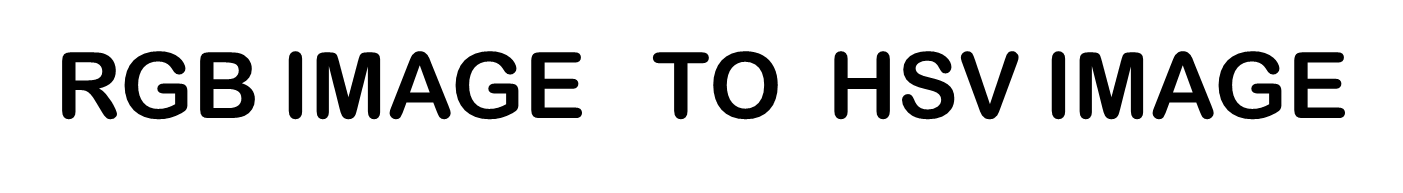**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Function to segment the green region in an RGB image
def segment_green(image, threshold=50):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define lower and upper bounds for green color in HSV
    lower_green = np.array([40, 40, 40])  # Adjust these values if needed
    upper_green = np.array([70, 255, 255])  # Adjust these values if needed
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    # Apply the mask to the original RGB image
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

# Sample RGB image
image = cv2.imread("/content/drive/MyDrive/TNRD/IMAGEprossing/0_0_0.png")

# Segment the green region
segmented_green = segment_green(image)

# Show the segmented green region
cv2_imshow(segmented_green)


**image.png**

Original Image


Segmented Green


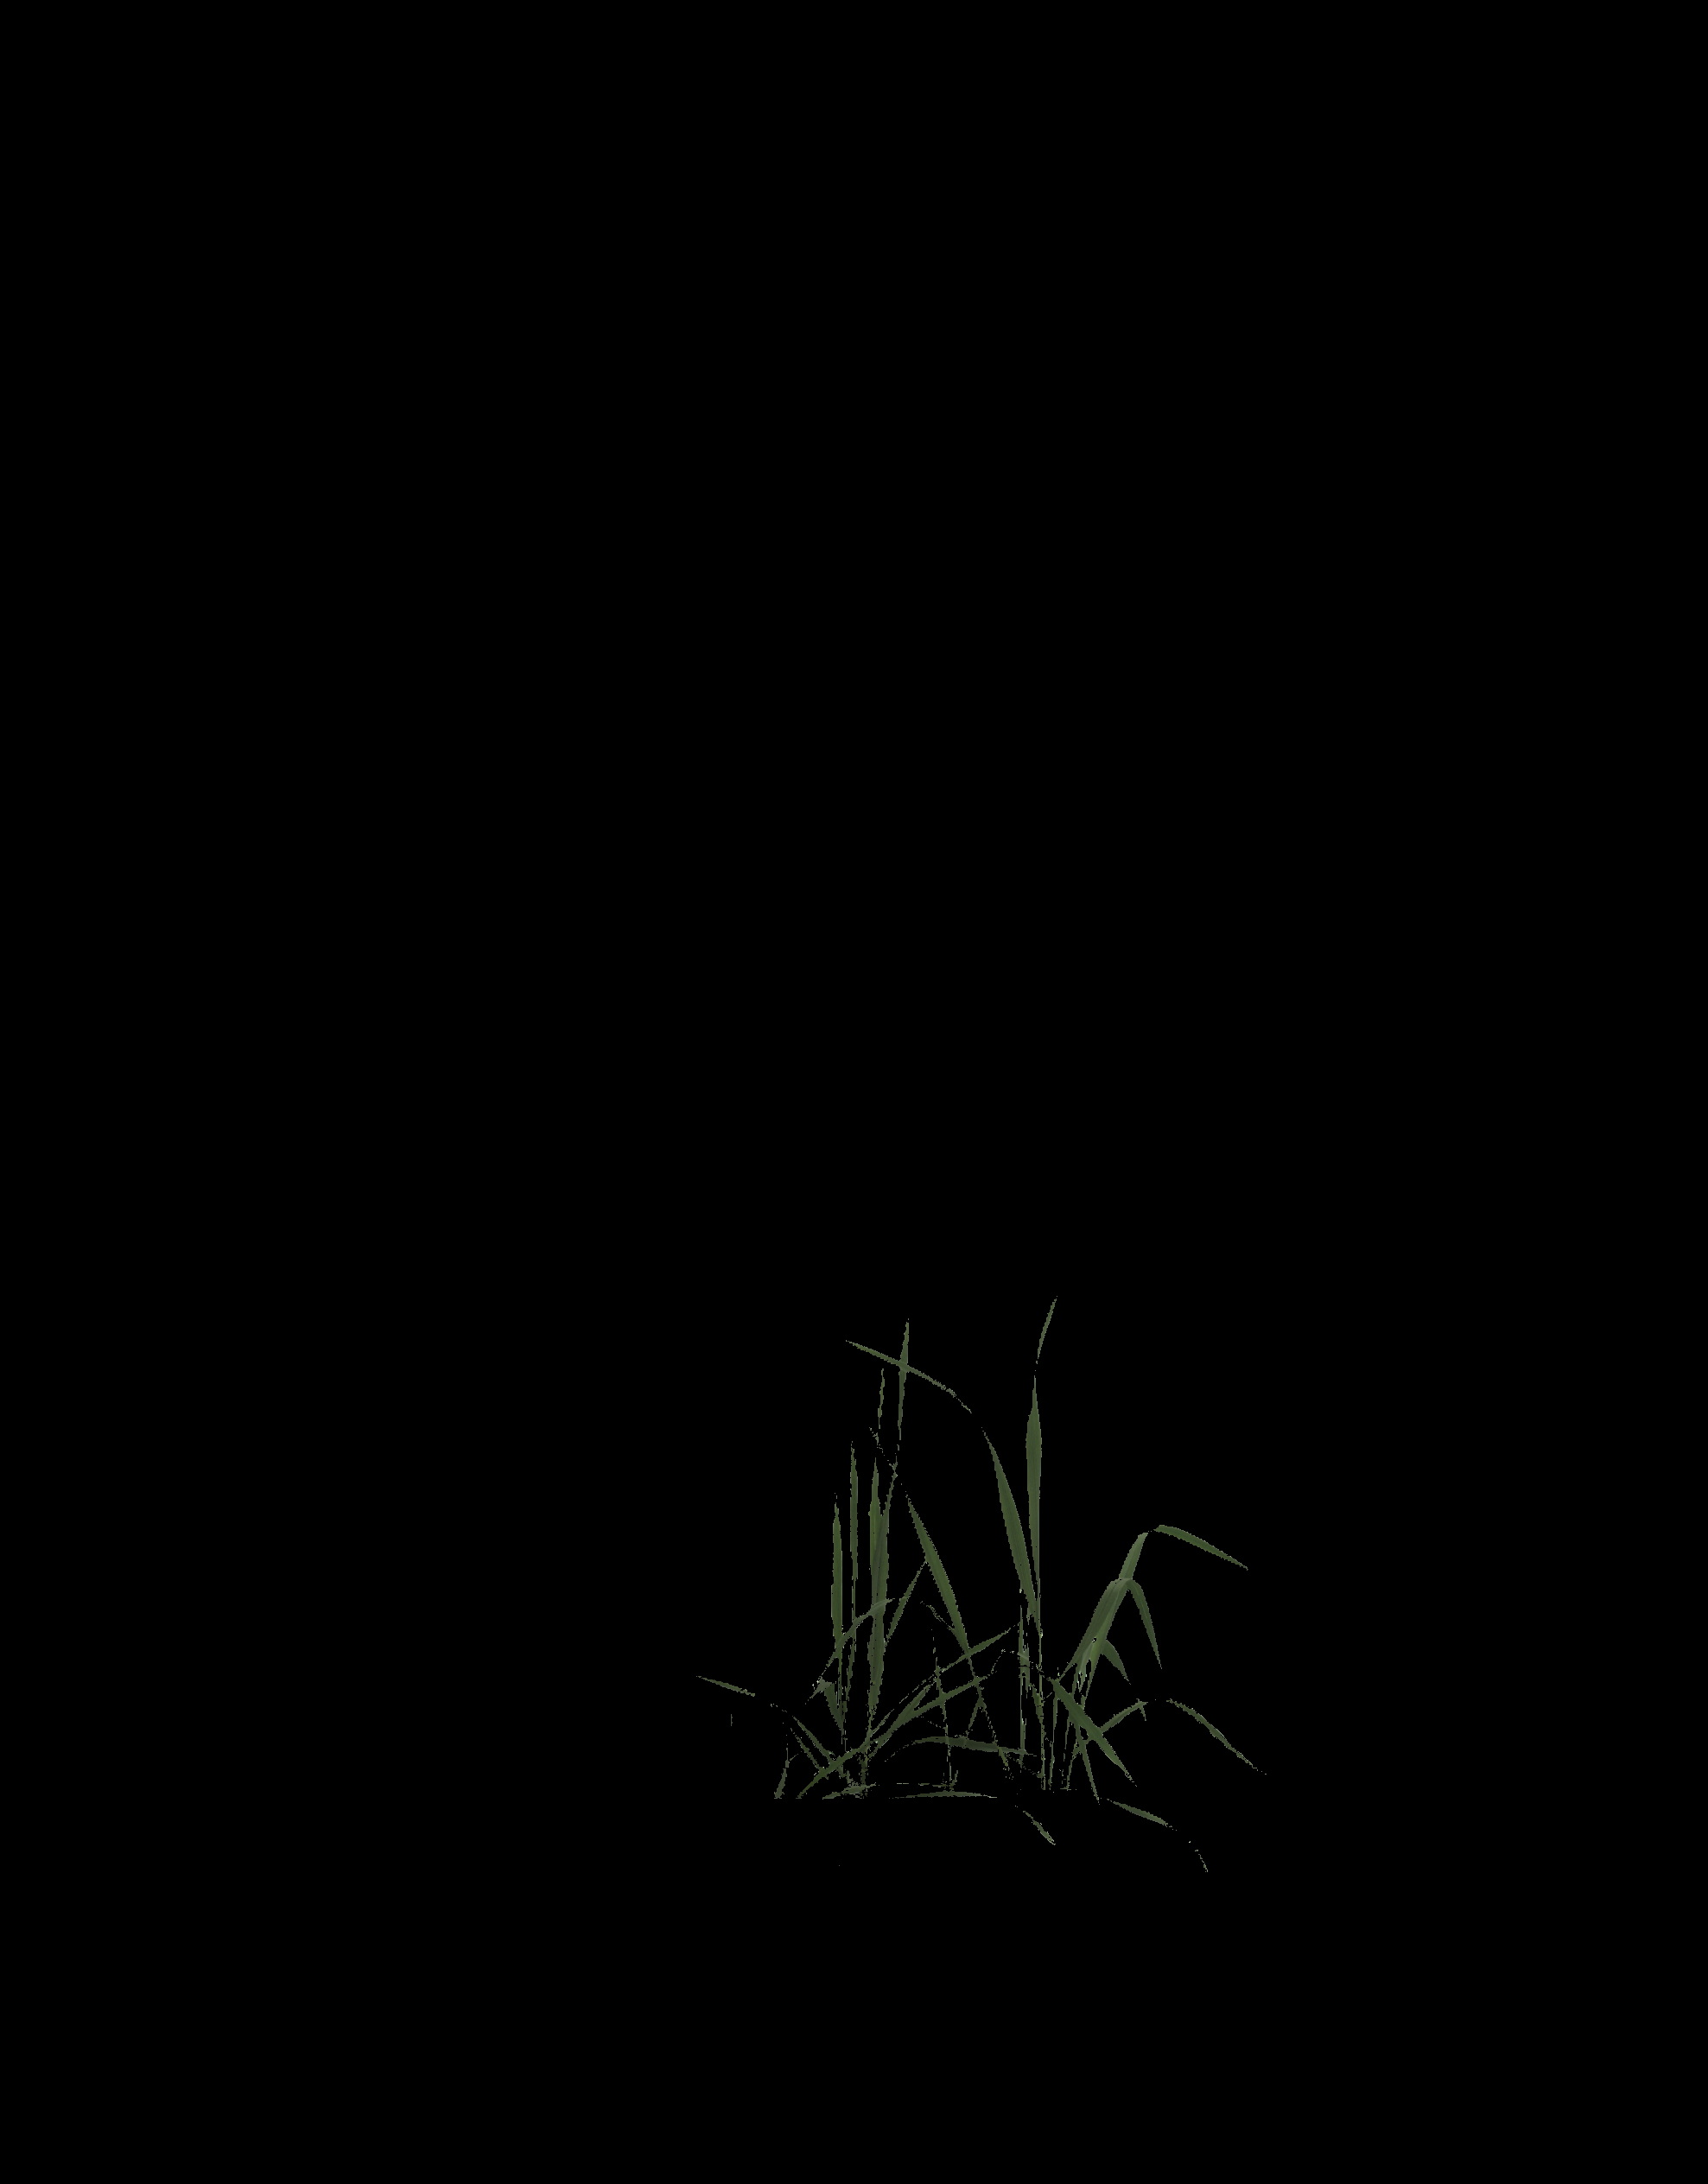

Eroded


Dilated


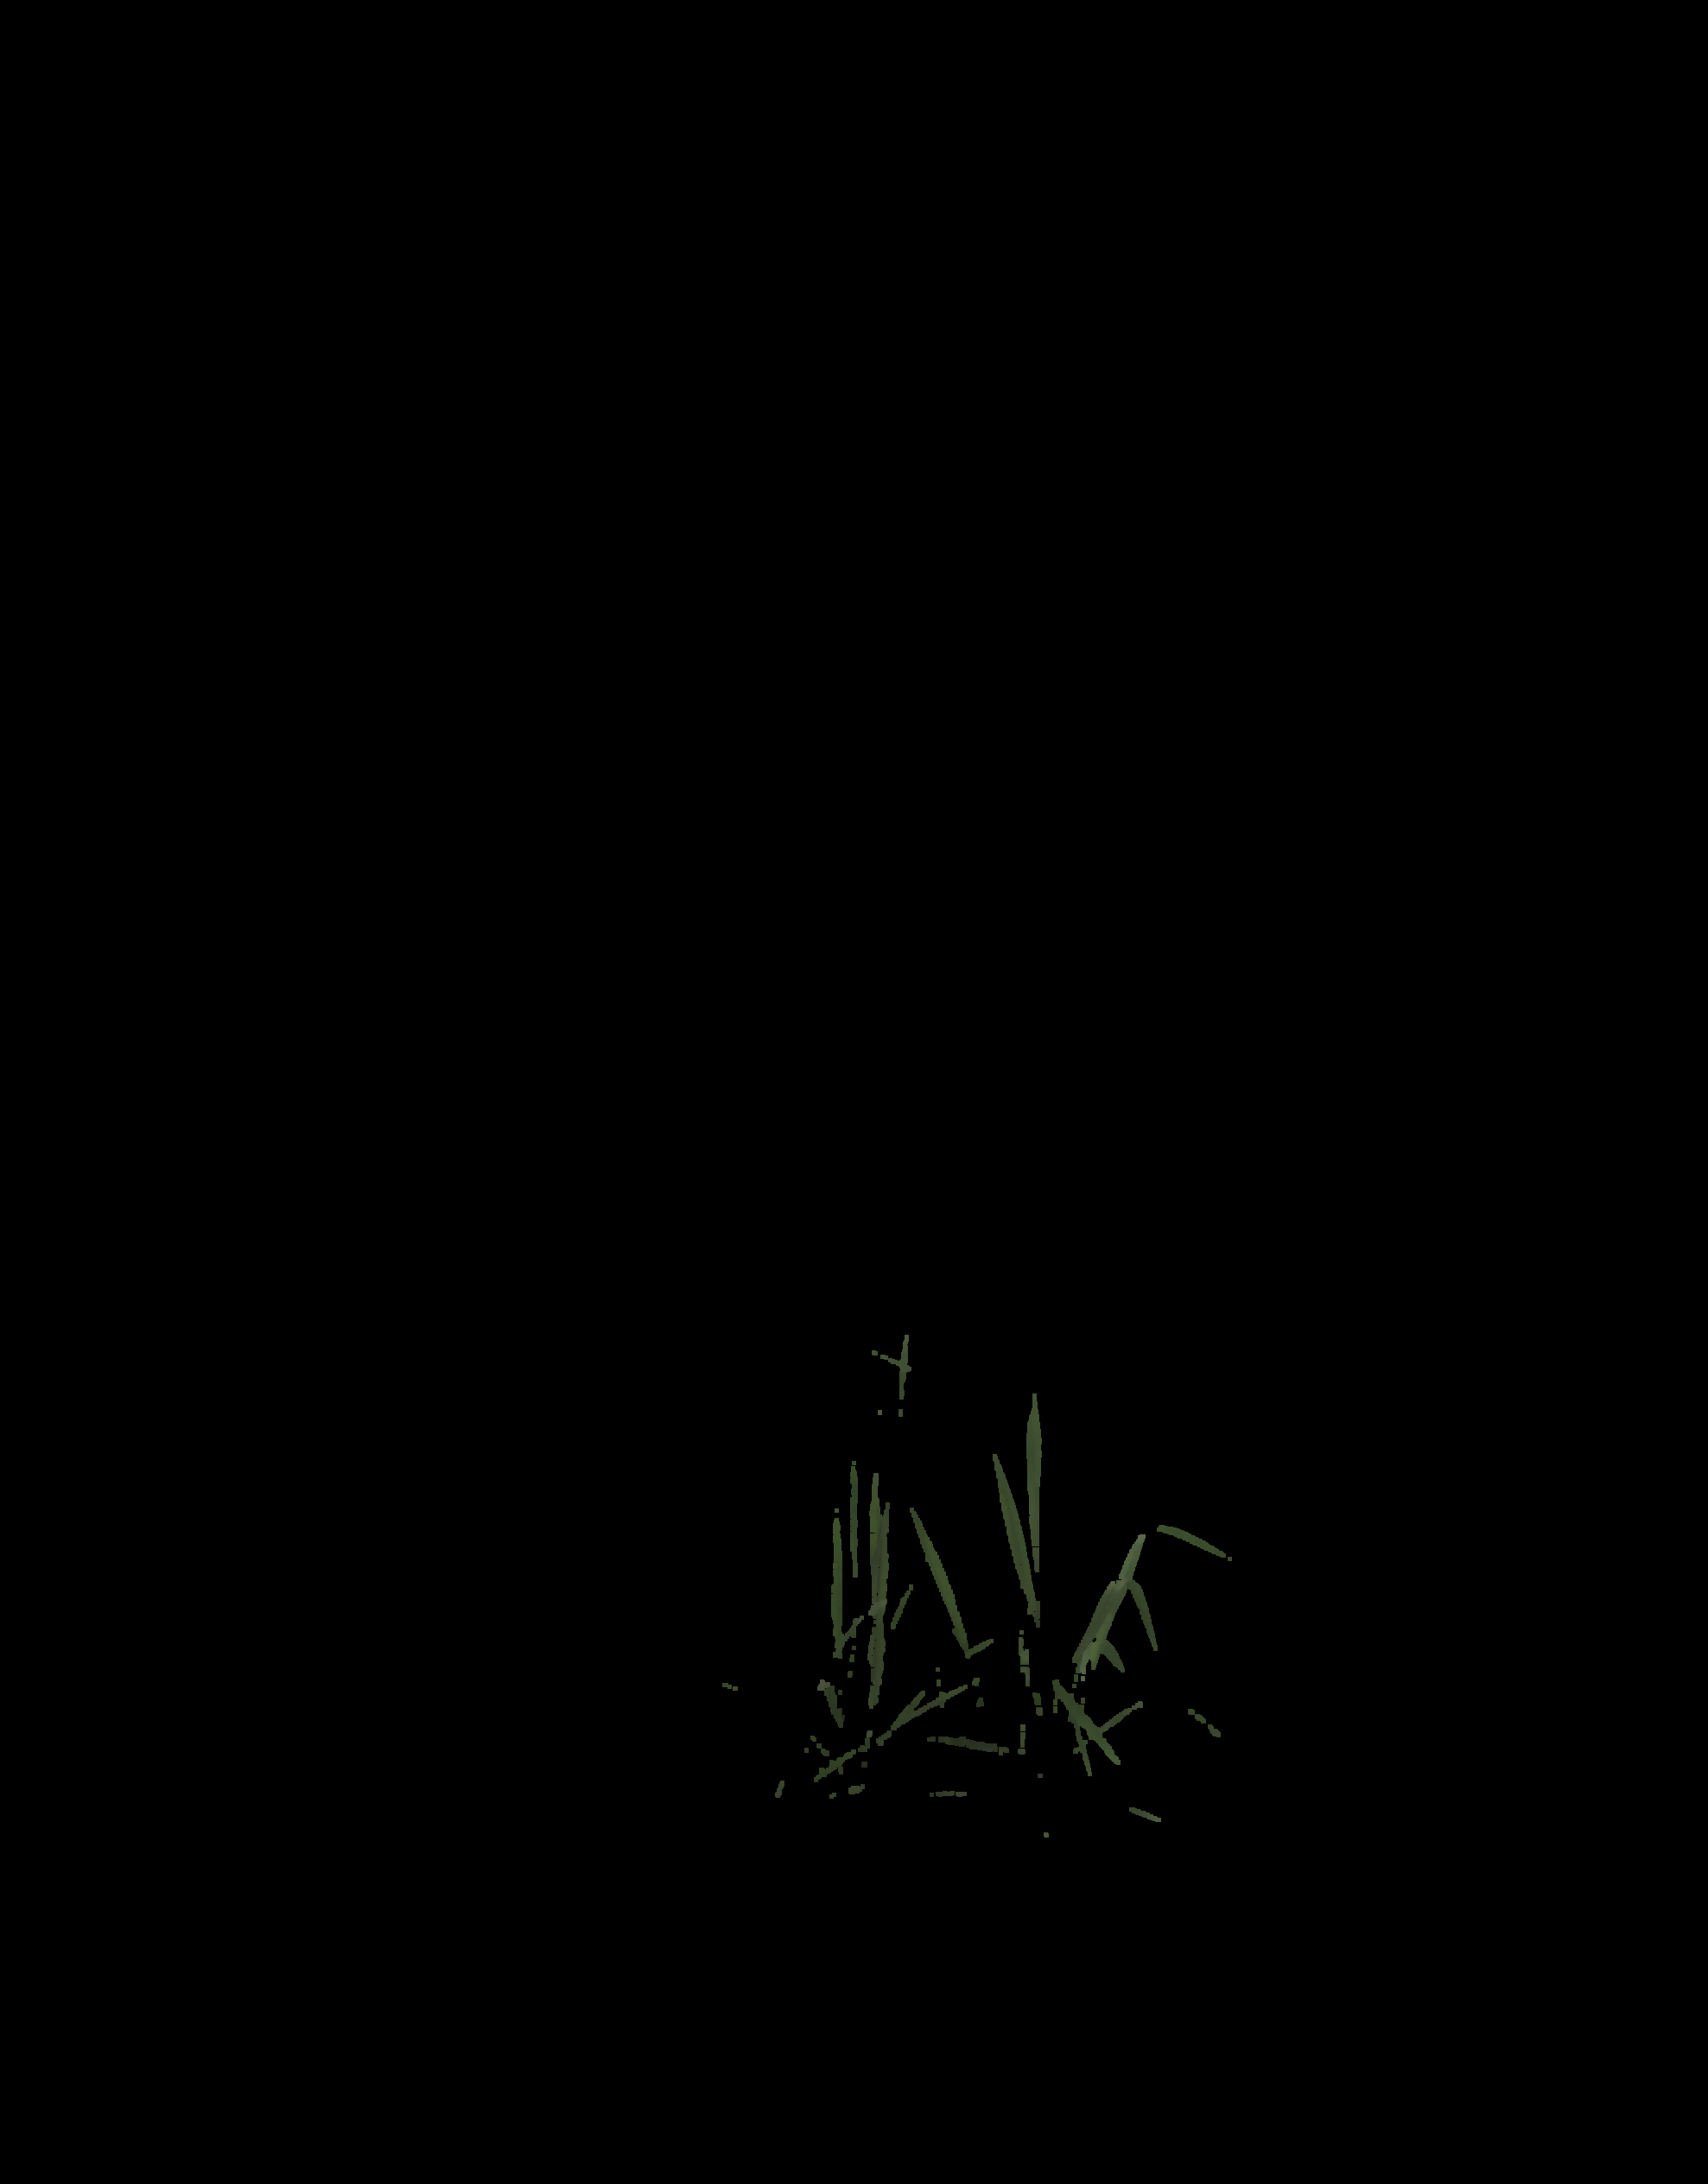

Opening


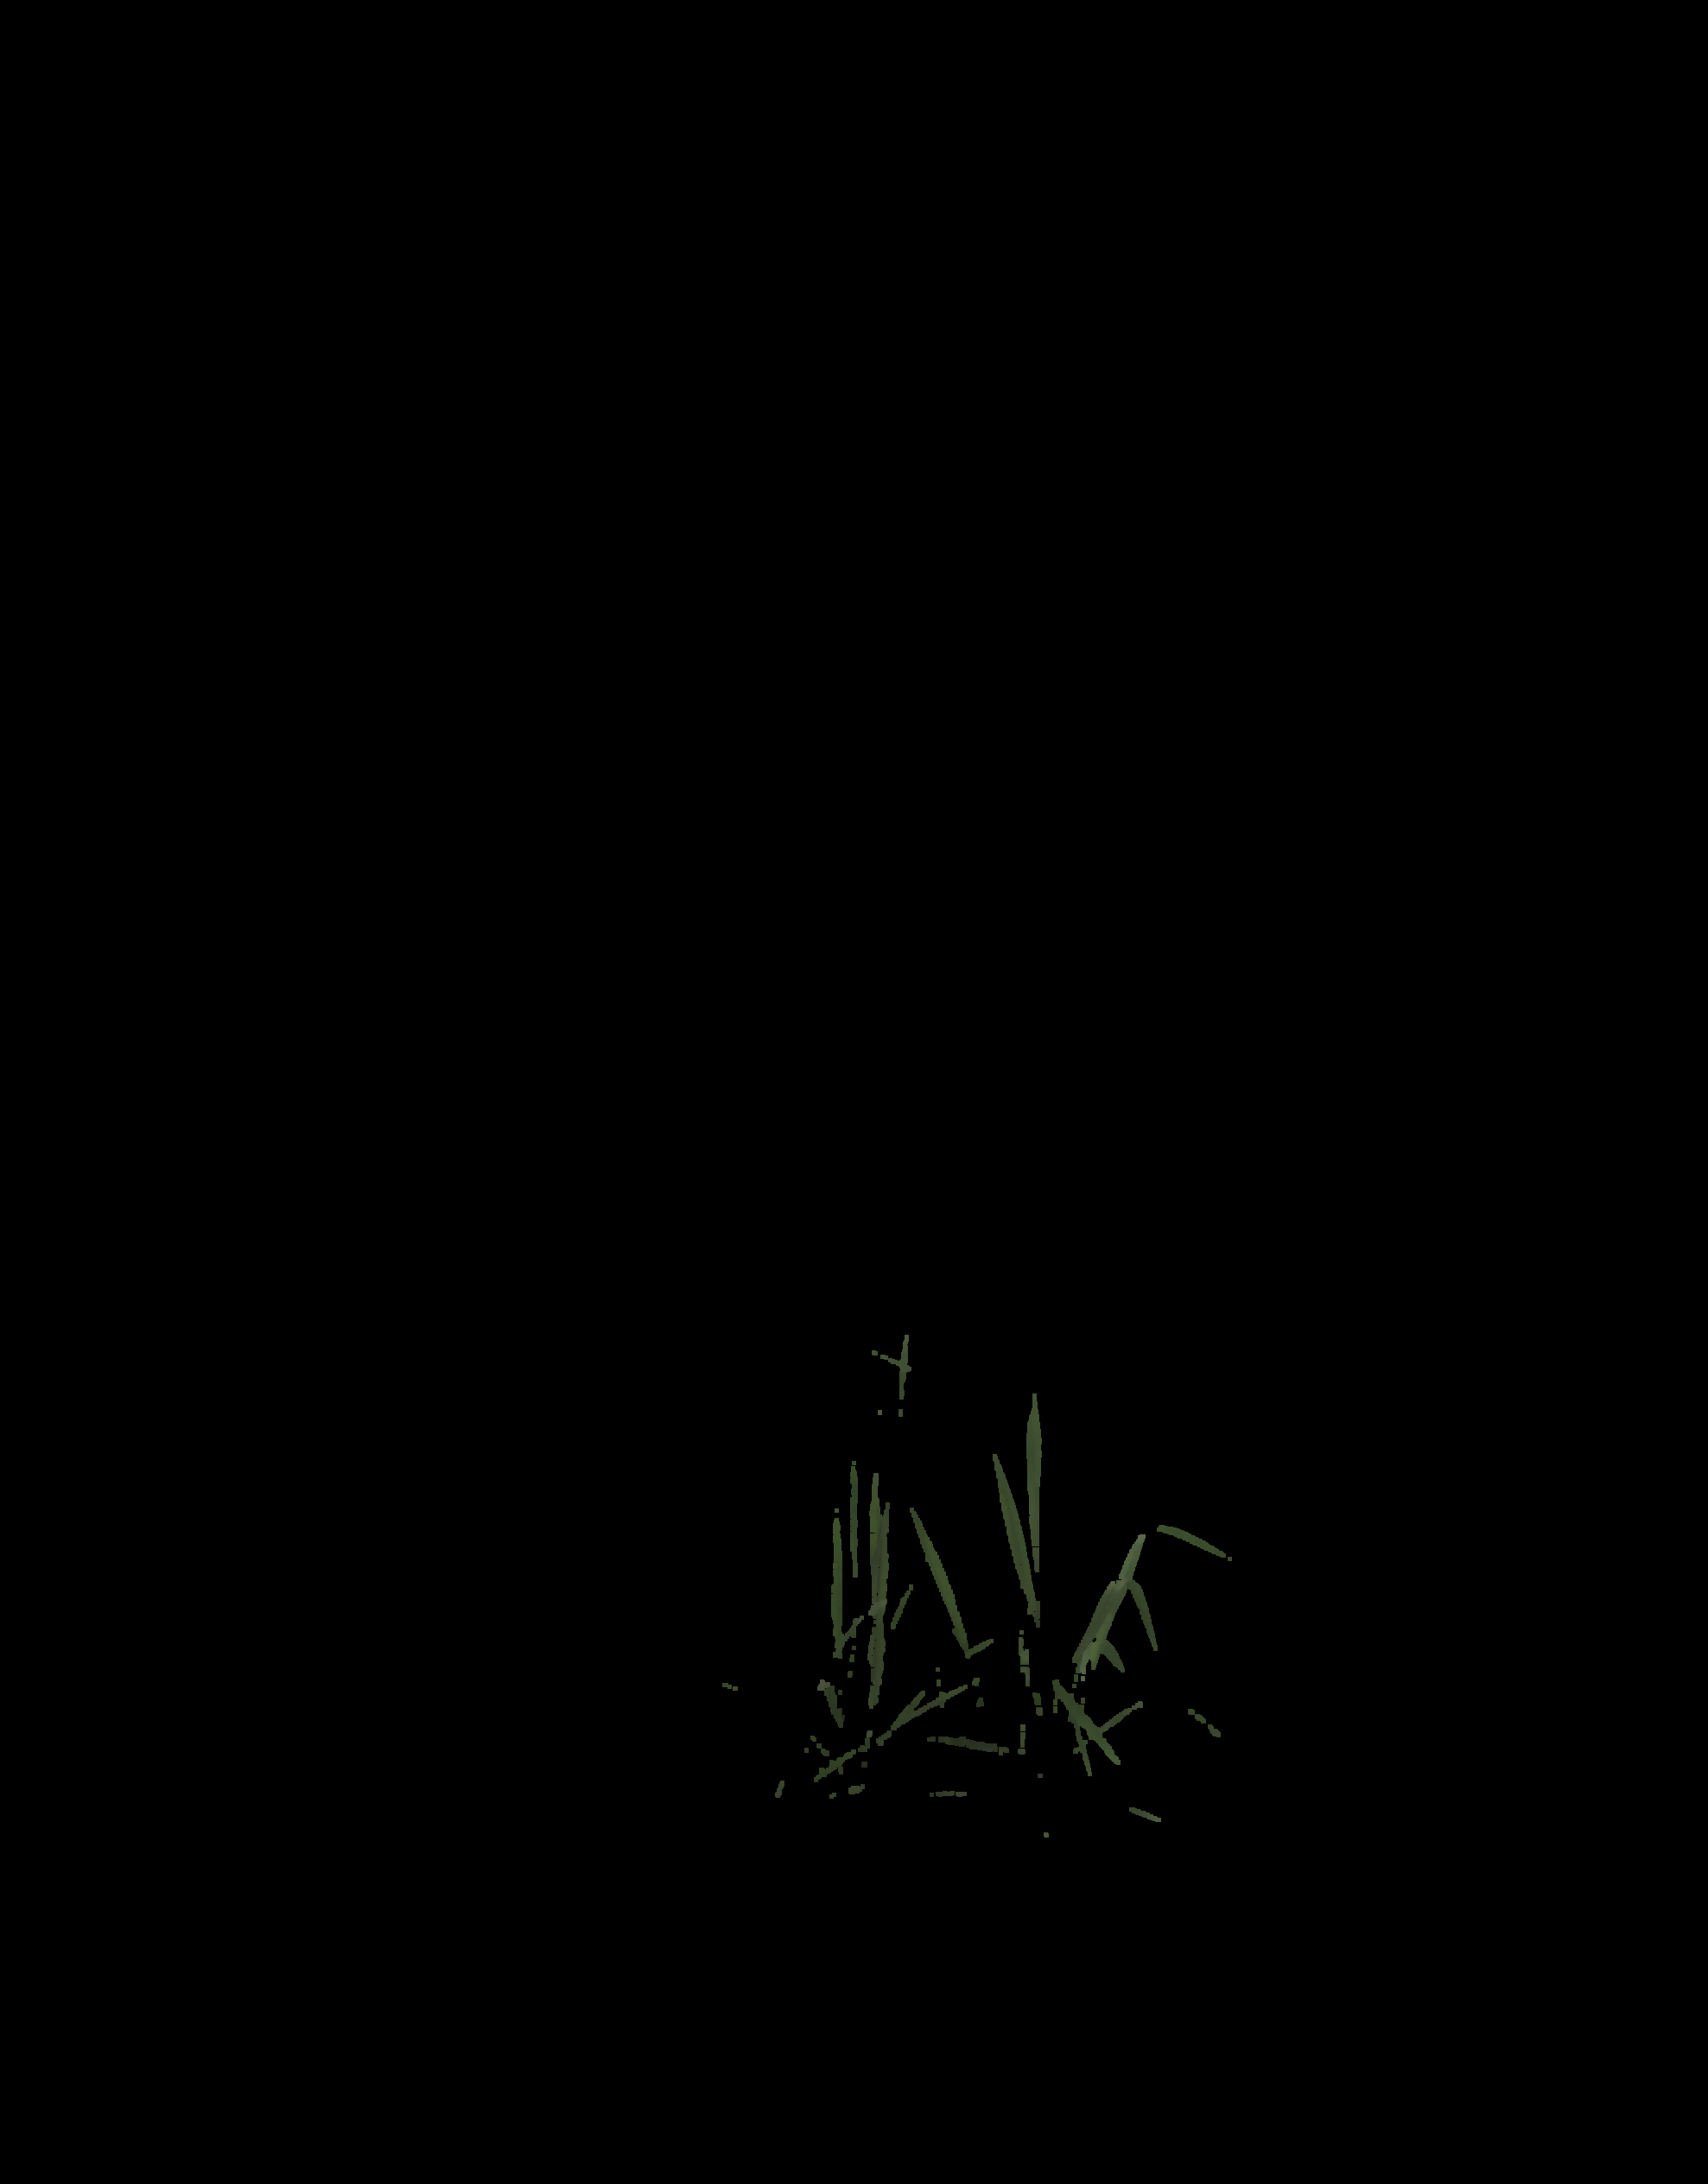

Closing


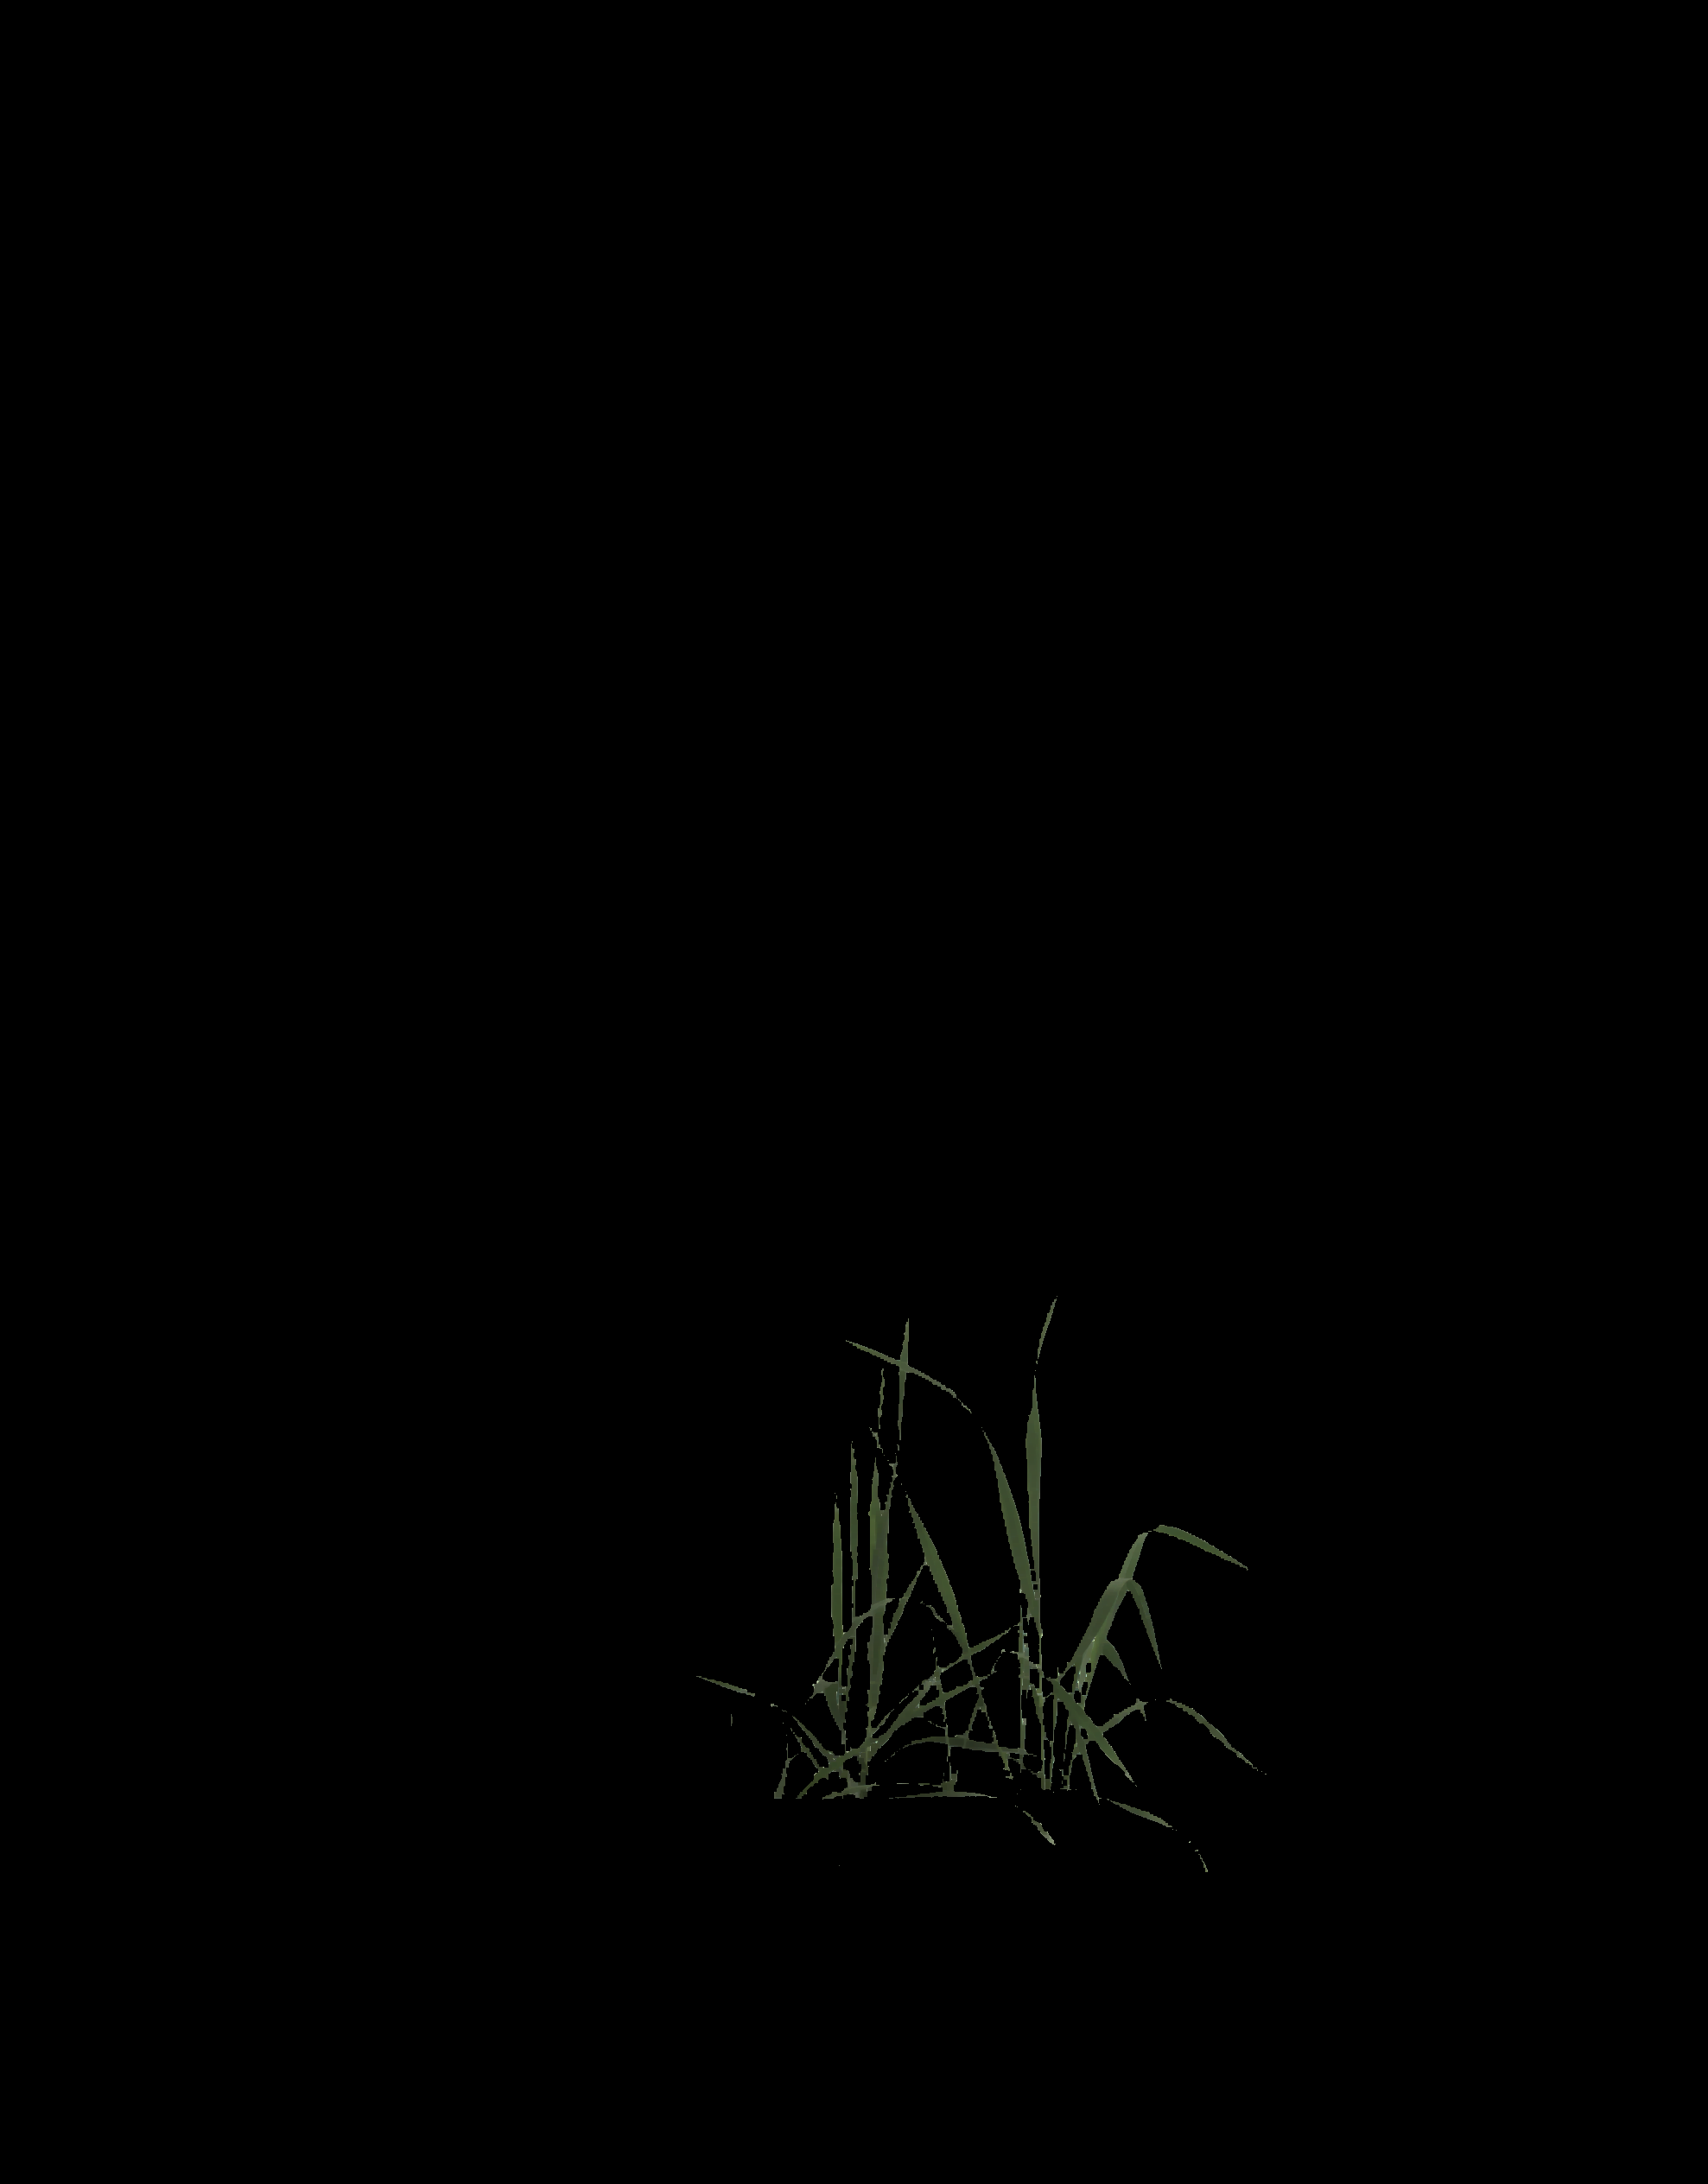

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Function to segment the green region in an RGB image
def segment_green(image, threshold=50):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define lower and upper bounds for green color in HSV
    lower_green = np.array([40, 40, 40])  # Adjust these values if needed
    upper_green = np.array([70, 255, 255])  # Adjust these values if needed
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    # Apply the mask to the original RGB image
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

# Function to apply morphological operations
def apply_morphological_operations(image):
    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply erosion
    eroded = cv2.erode(image, kernel, iterations=1)

    # Apply dilation
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    # Apply opening (erosion followed by dilation)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Apply closing (dilation followed by erosion)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    return eroded, dilated, opening, closing

# Sample RGB image
image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print(f"Error: Unable to load the image at {image_path}. Please check the file path and format.")
else:
    # Segment the green region
    segmented_green = segment_green(image)

    # Apply morphological operations
    eroded, dilated, opening, closing = apply_morphological_operations(segmented_green)

    # Show the original and processed images
    print("Original Image")
    cv2_imshow(image)

    print("Segmented Green")
    cv2_imshow(segmented_green)

    print("Eroded")
    cv2_imshow(eroded)

    print("Dilated")
    cv2_imshow(dilated)

    print("Opening")
    cv2_imshow(opening)

    print("Closing")
    cv2_imshow(closing)


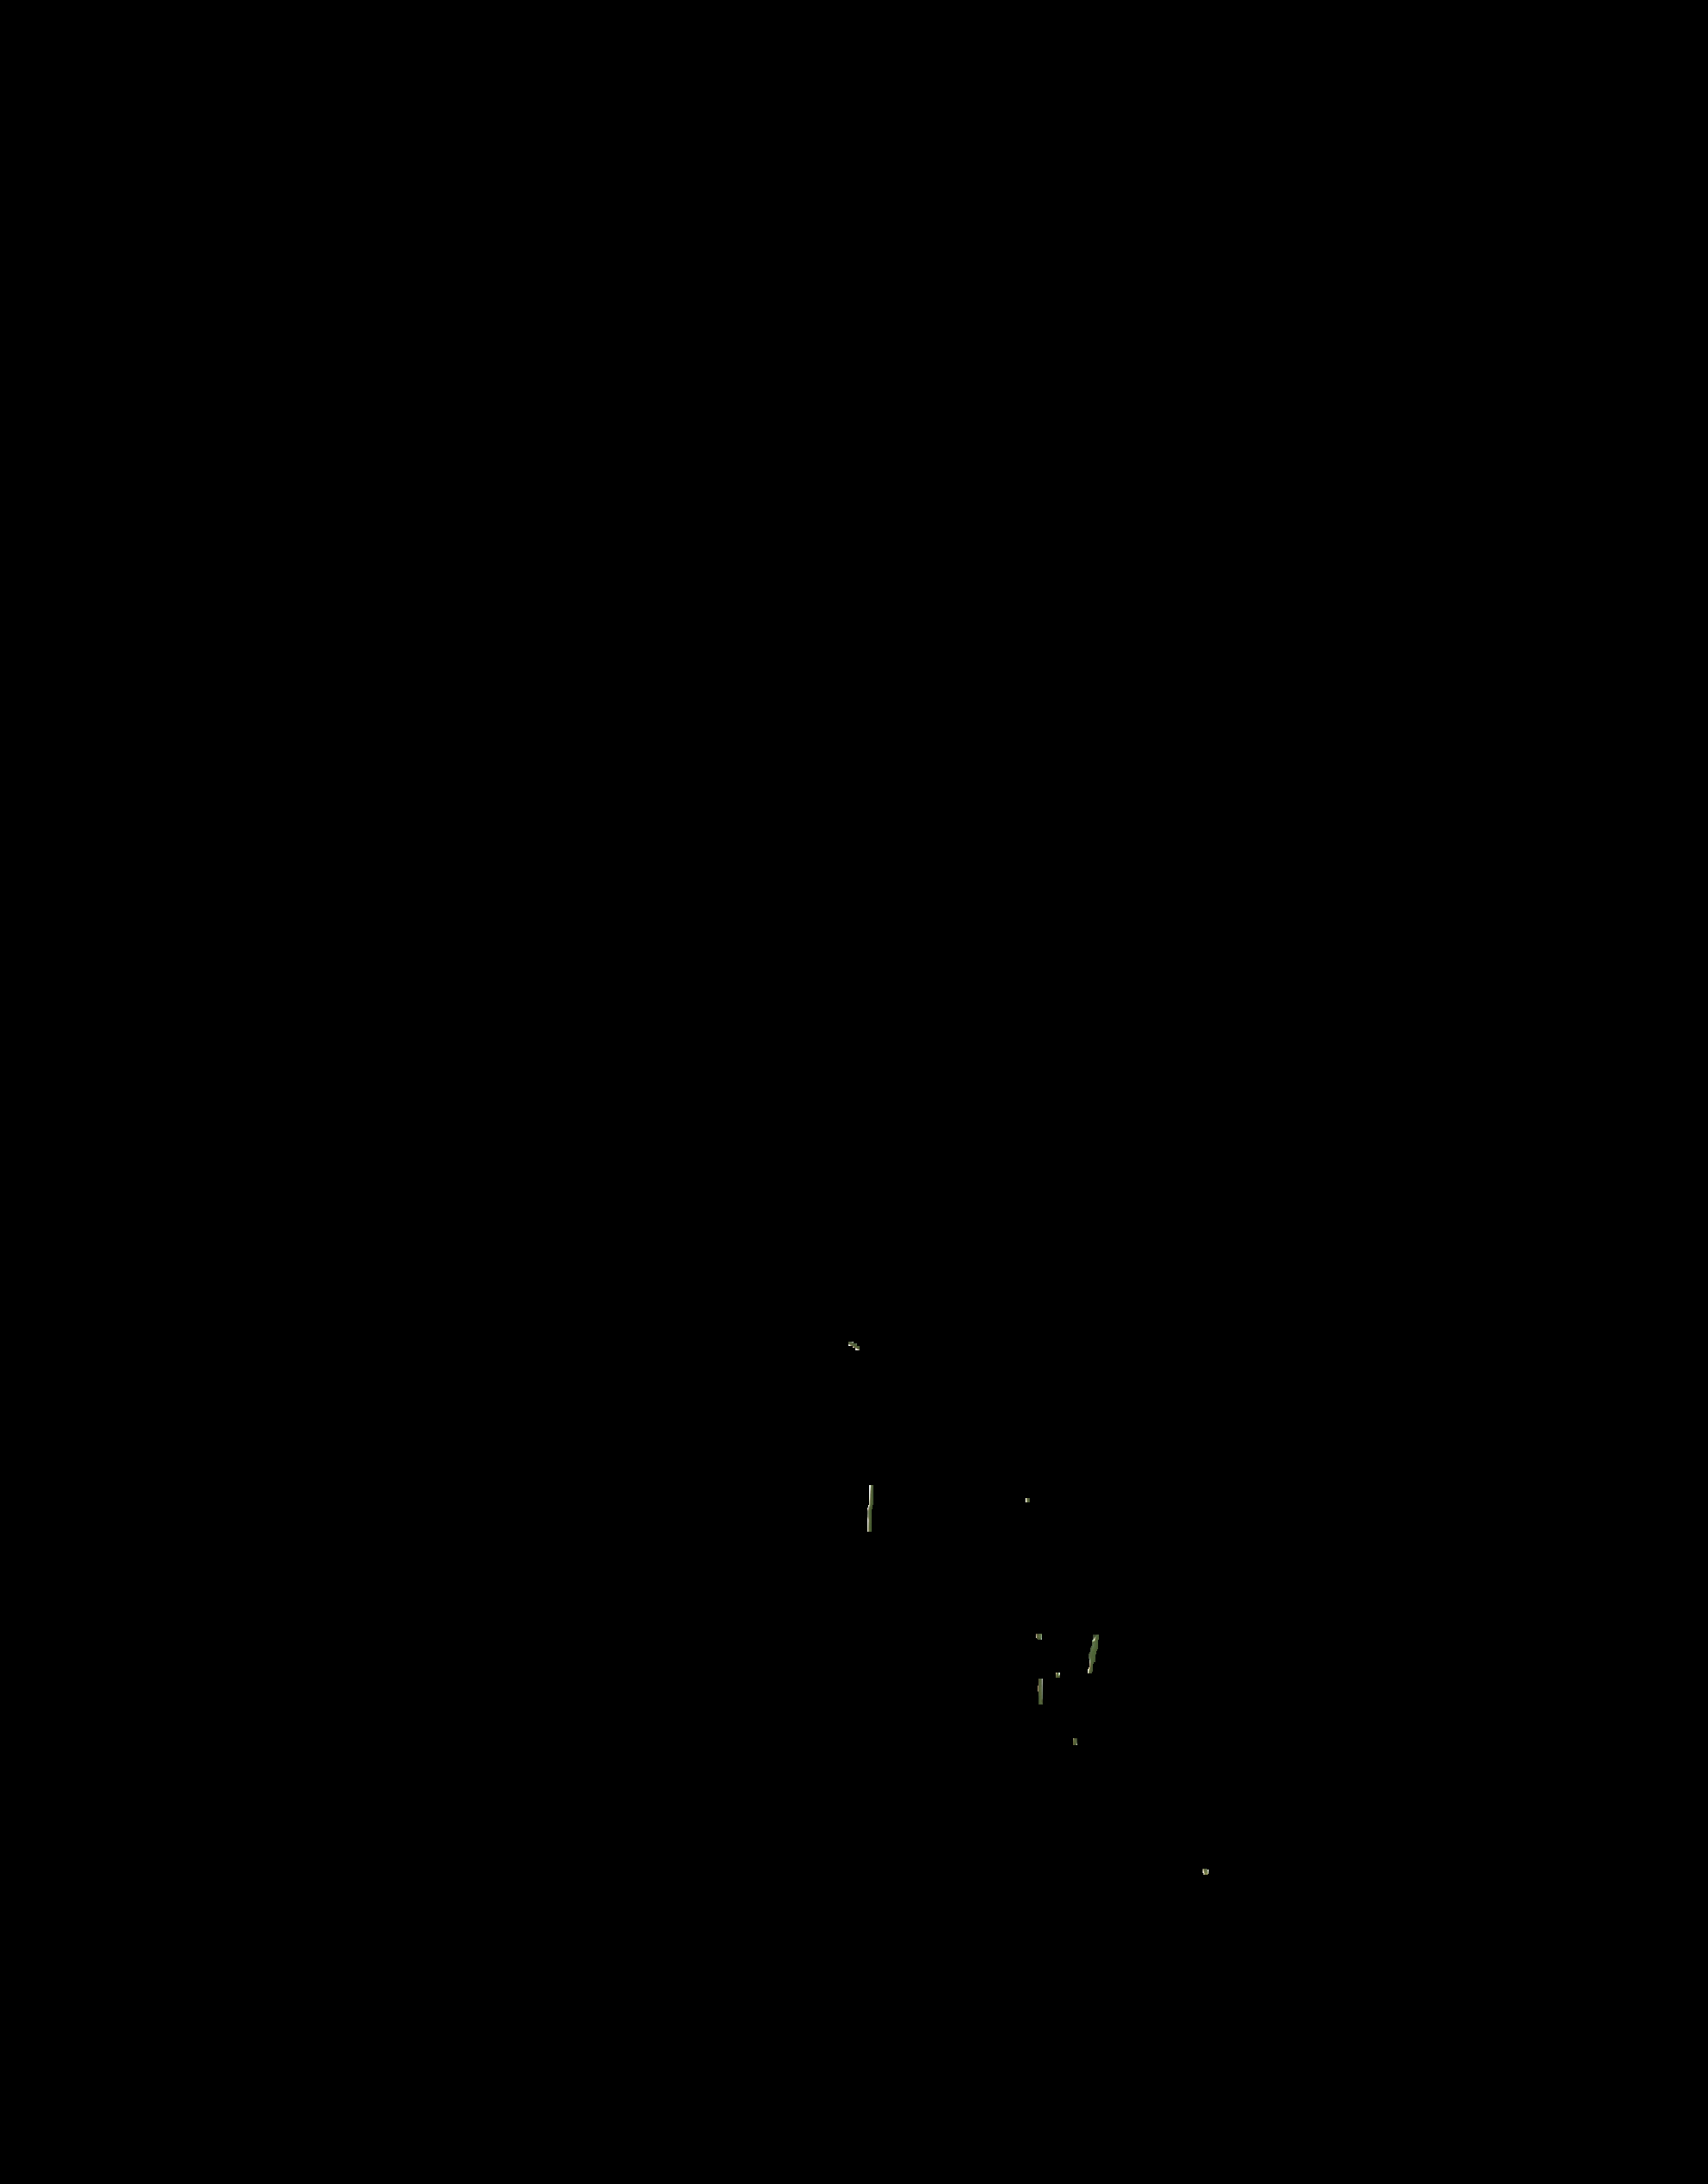

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread( "/content/drive/MyDrive/IMAGEprossing/0_0_0.png")

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the green color in HSV
# Adjust these values based on your specific green shade
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Create a mask that includes only the green parts of the image
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply Gaussian blur to reduce noise
mask = cv2.GaussianBlur(mask, (5, 5), 0)

# Apply morphological operations to remove small noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # Fill gaps

# Apply the mask to the original image to extract the green parts
green_only = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the green-only image
#cv2_imshow('Original Image', image)
cv2_imshow( green_only)

# Wait until a key is pressed and then close the image windows
##cv2.waitKey(0)
#cv2.destroyAllWindows()


**bold text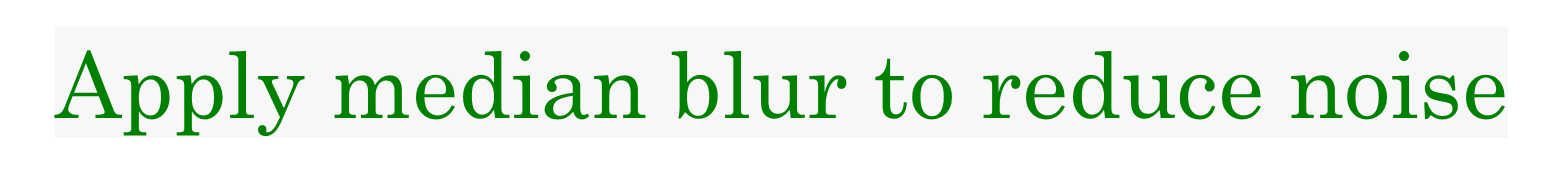**

Original Image


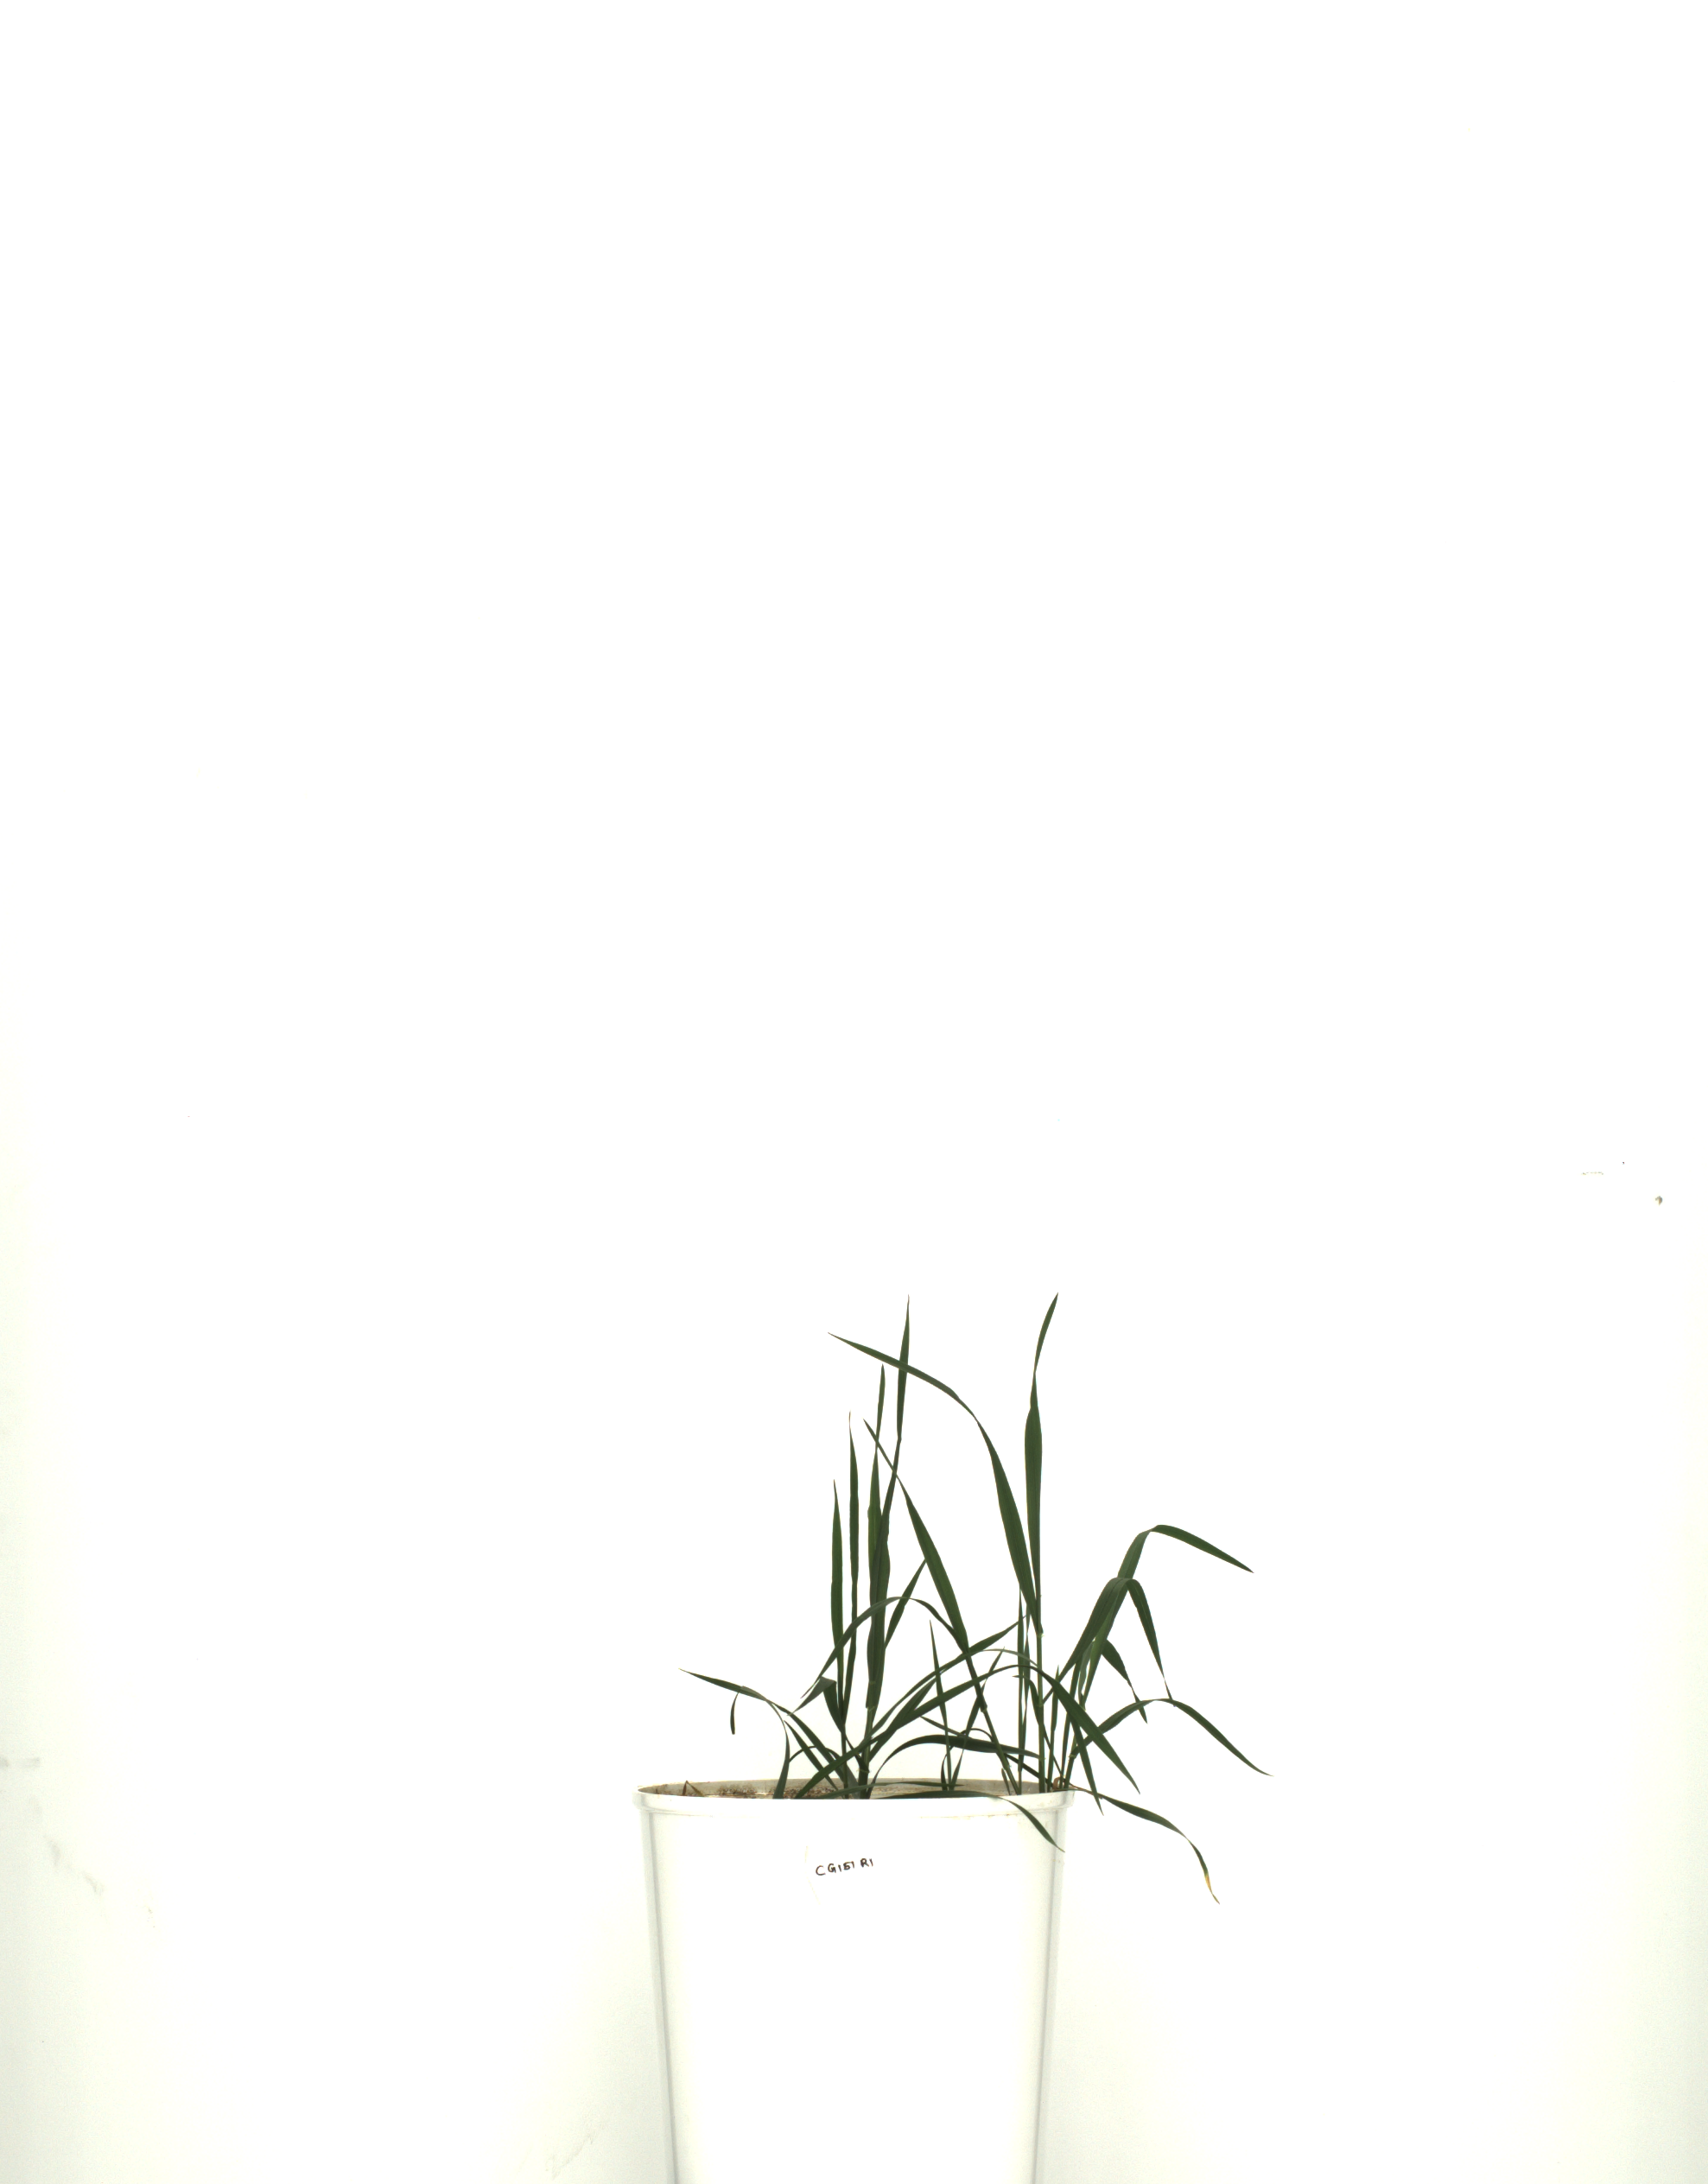

Green Only Image


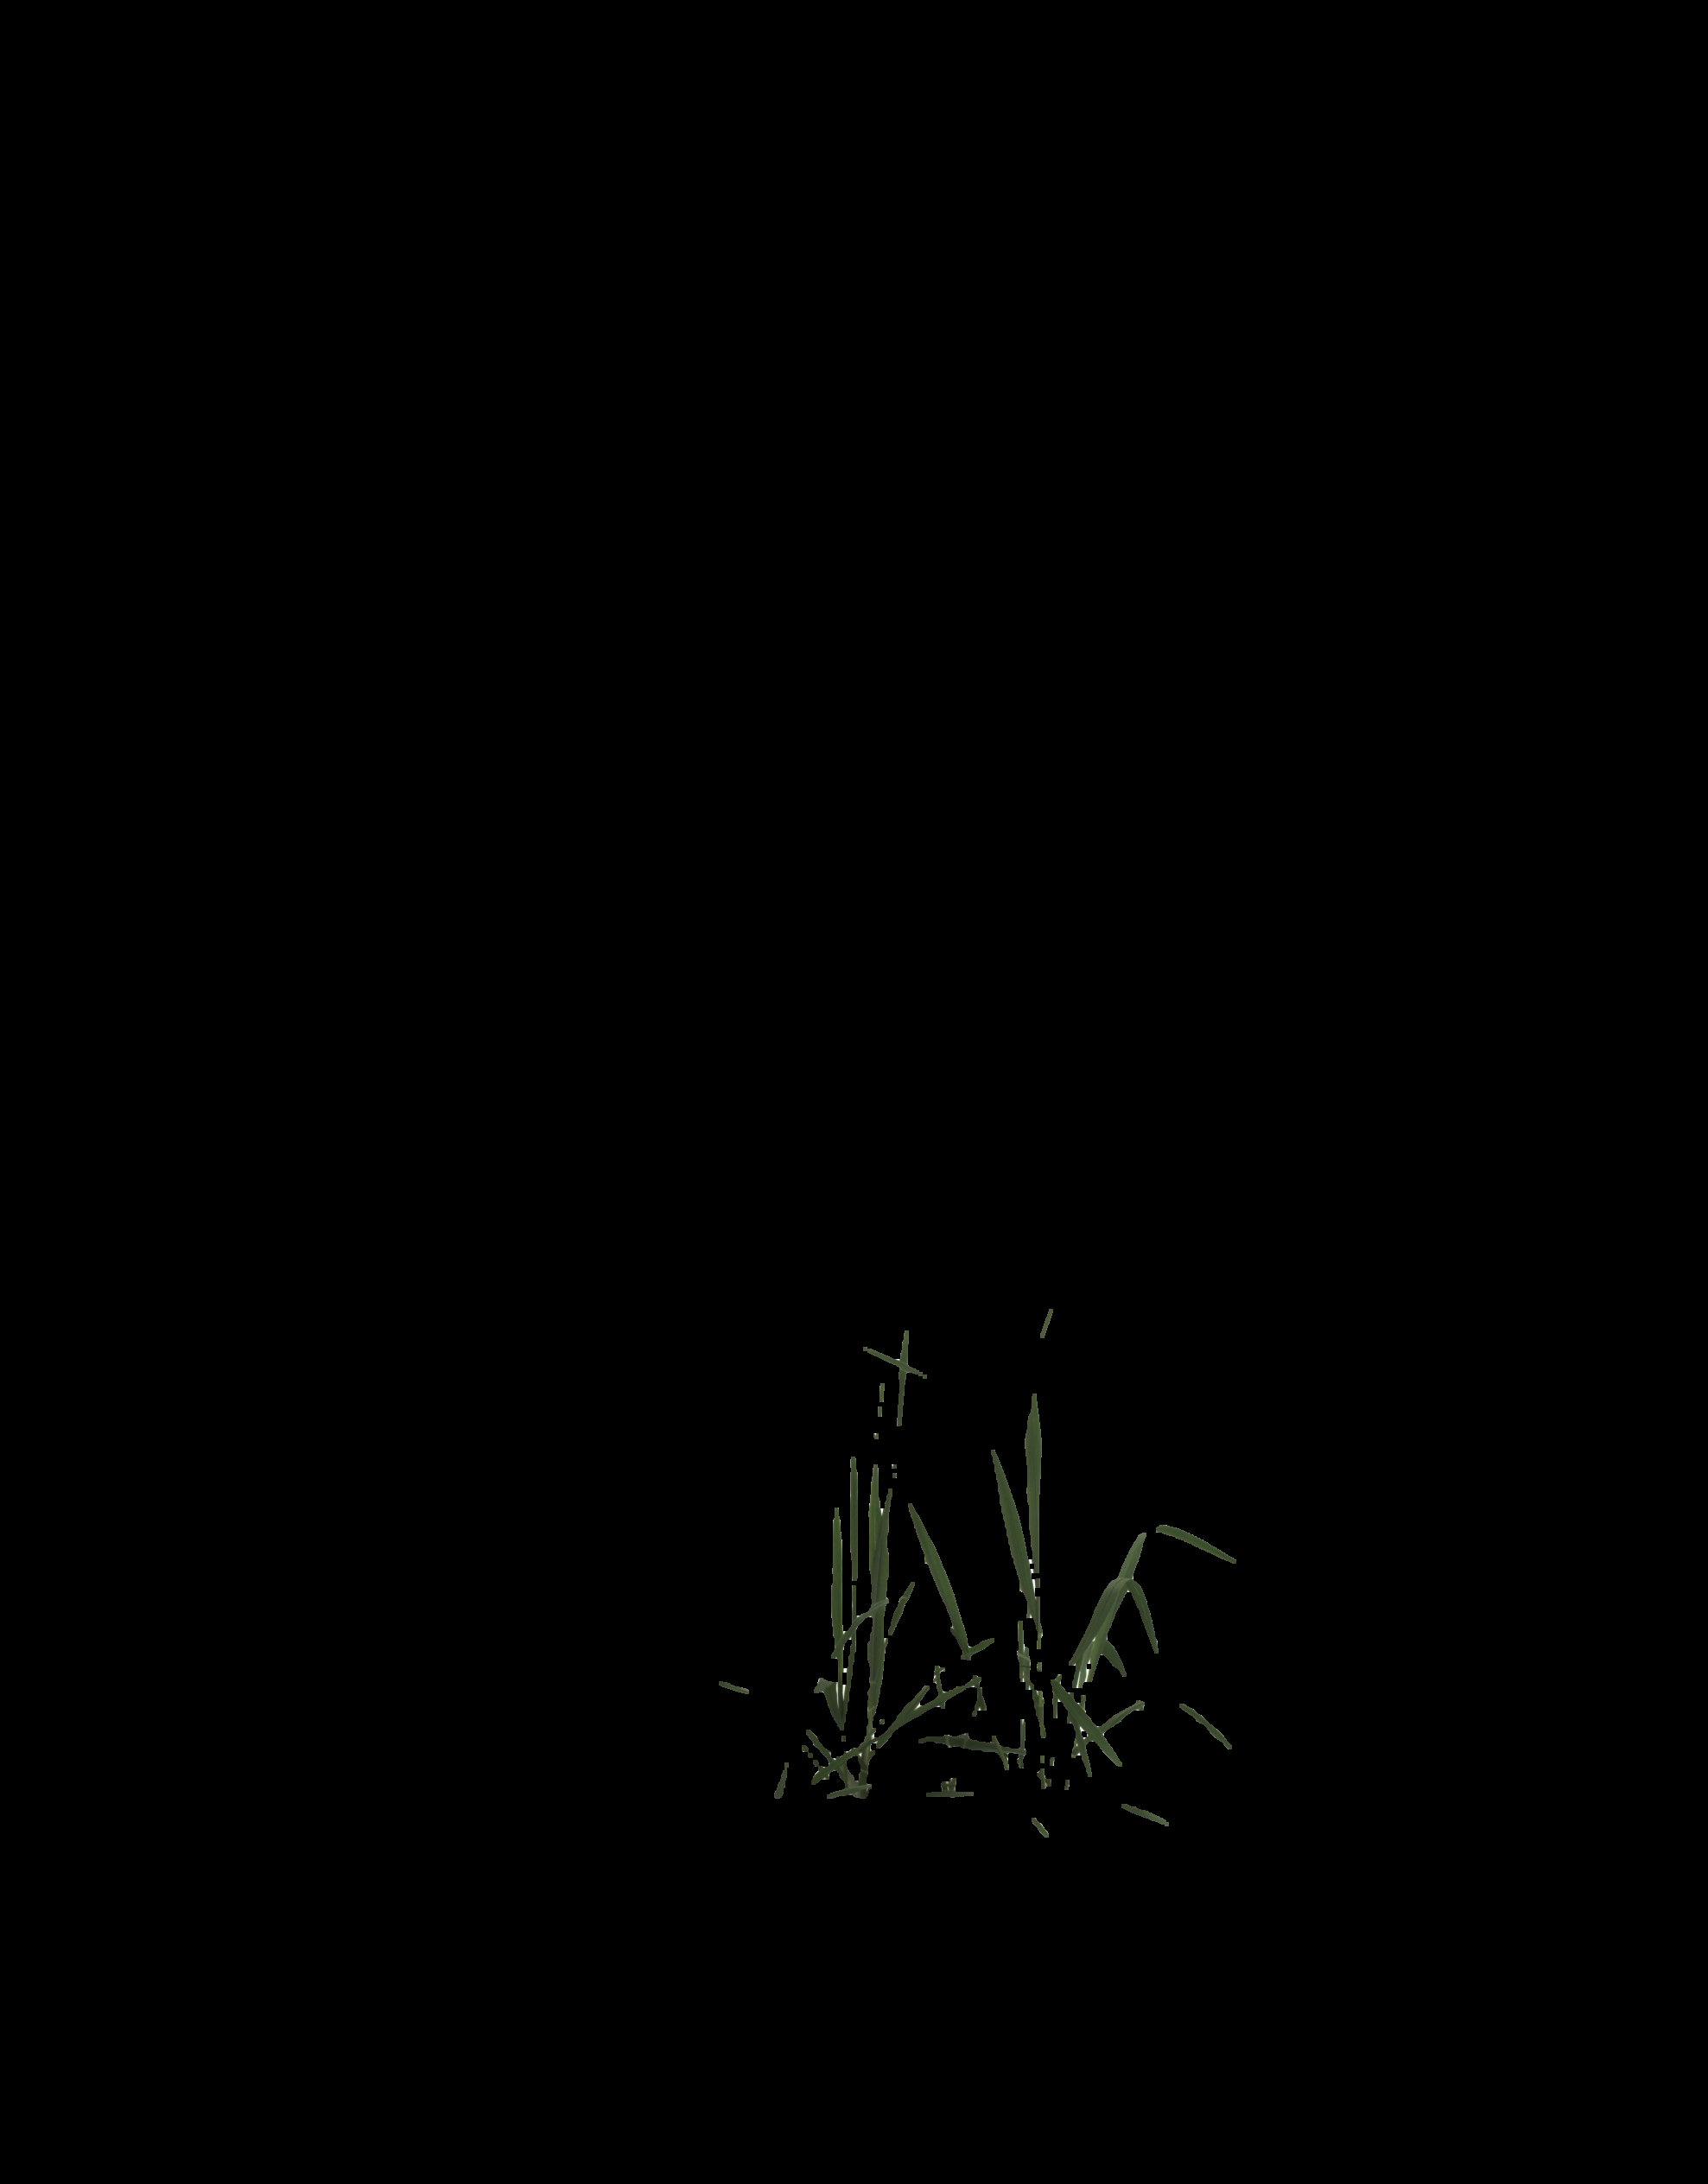

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/drive/MyDrive/IMAGEprossing/0_0_0.png")

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the green color in HSV
# These values can be adjusted based on your specific green shade
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Create a mask that includes only the green parts of the image
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply median blur to reduce noise
mask = cv2.medianBlur(mask, 5)

# Apply morphological operations to remove small noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # Fill gaps

# Apply the mask to the original image to extract the green parts
green_only = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the green-only image
print('Original Image')
cv2_imshow(image)

print('Green Only Image')
cv2_imshow(green_only)


**bold textimage.png**

Original Image


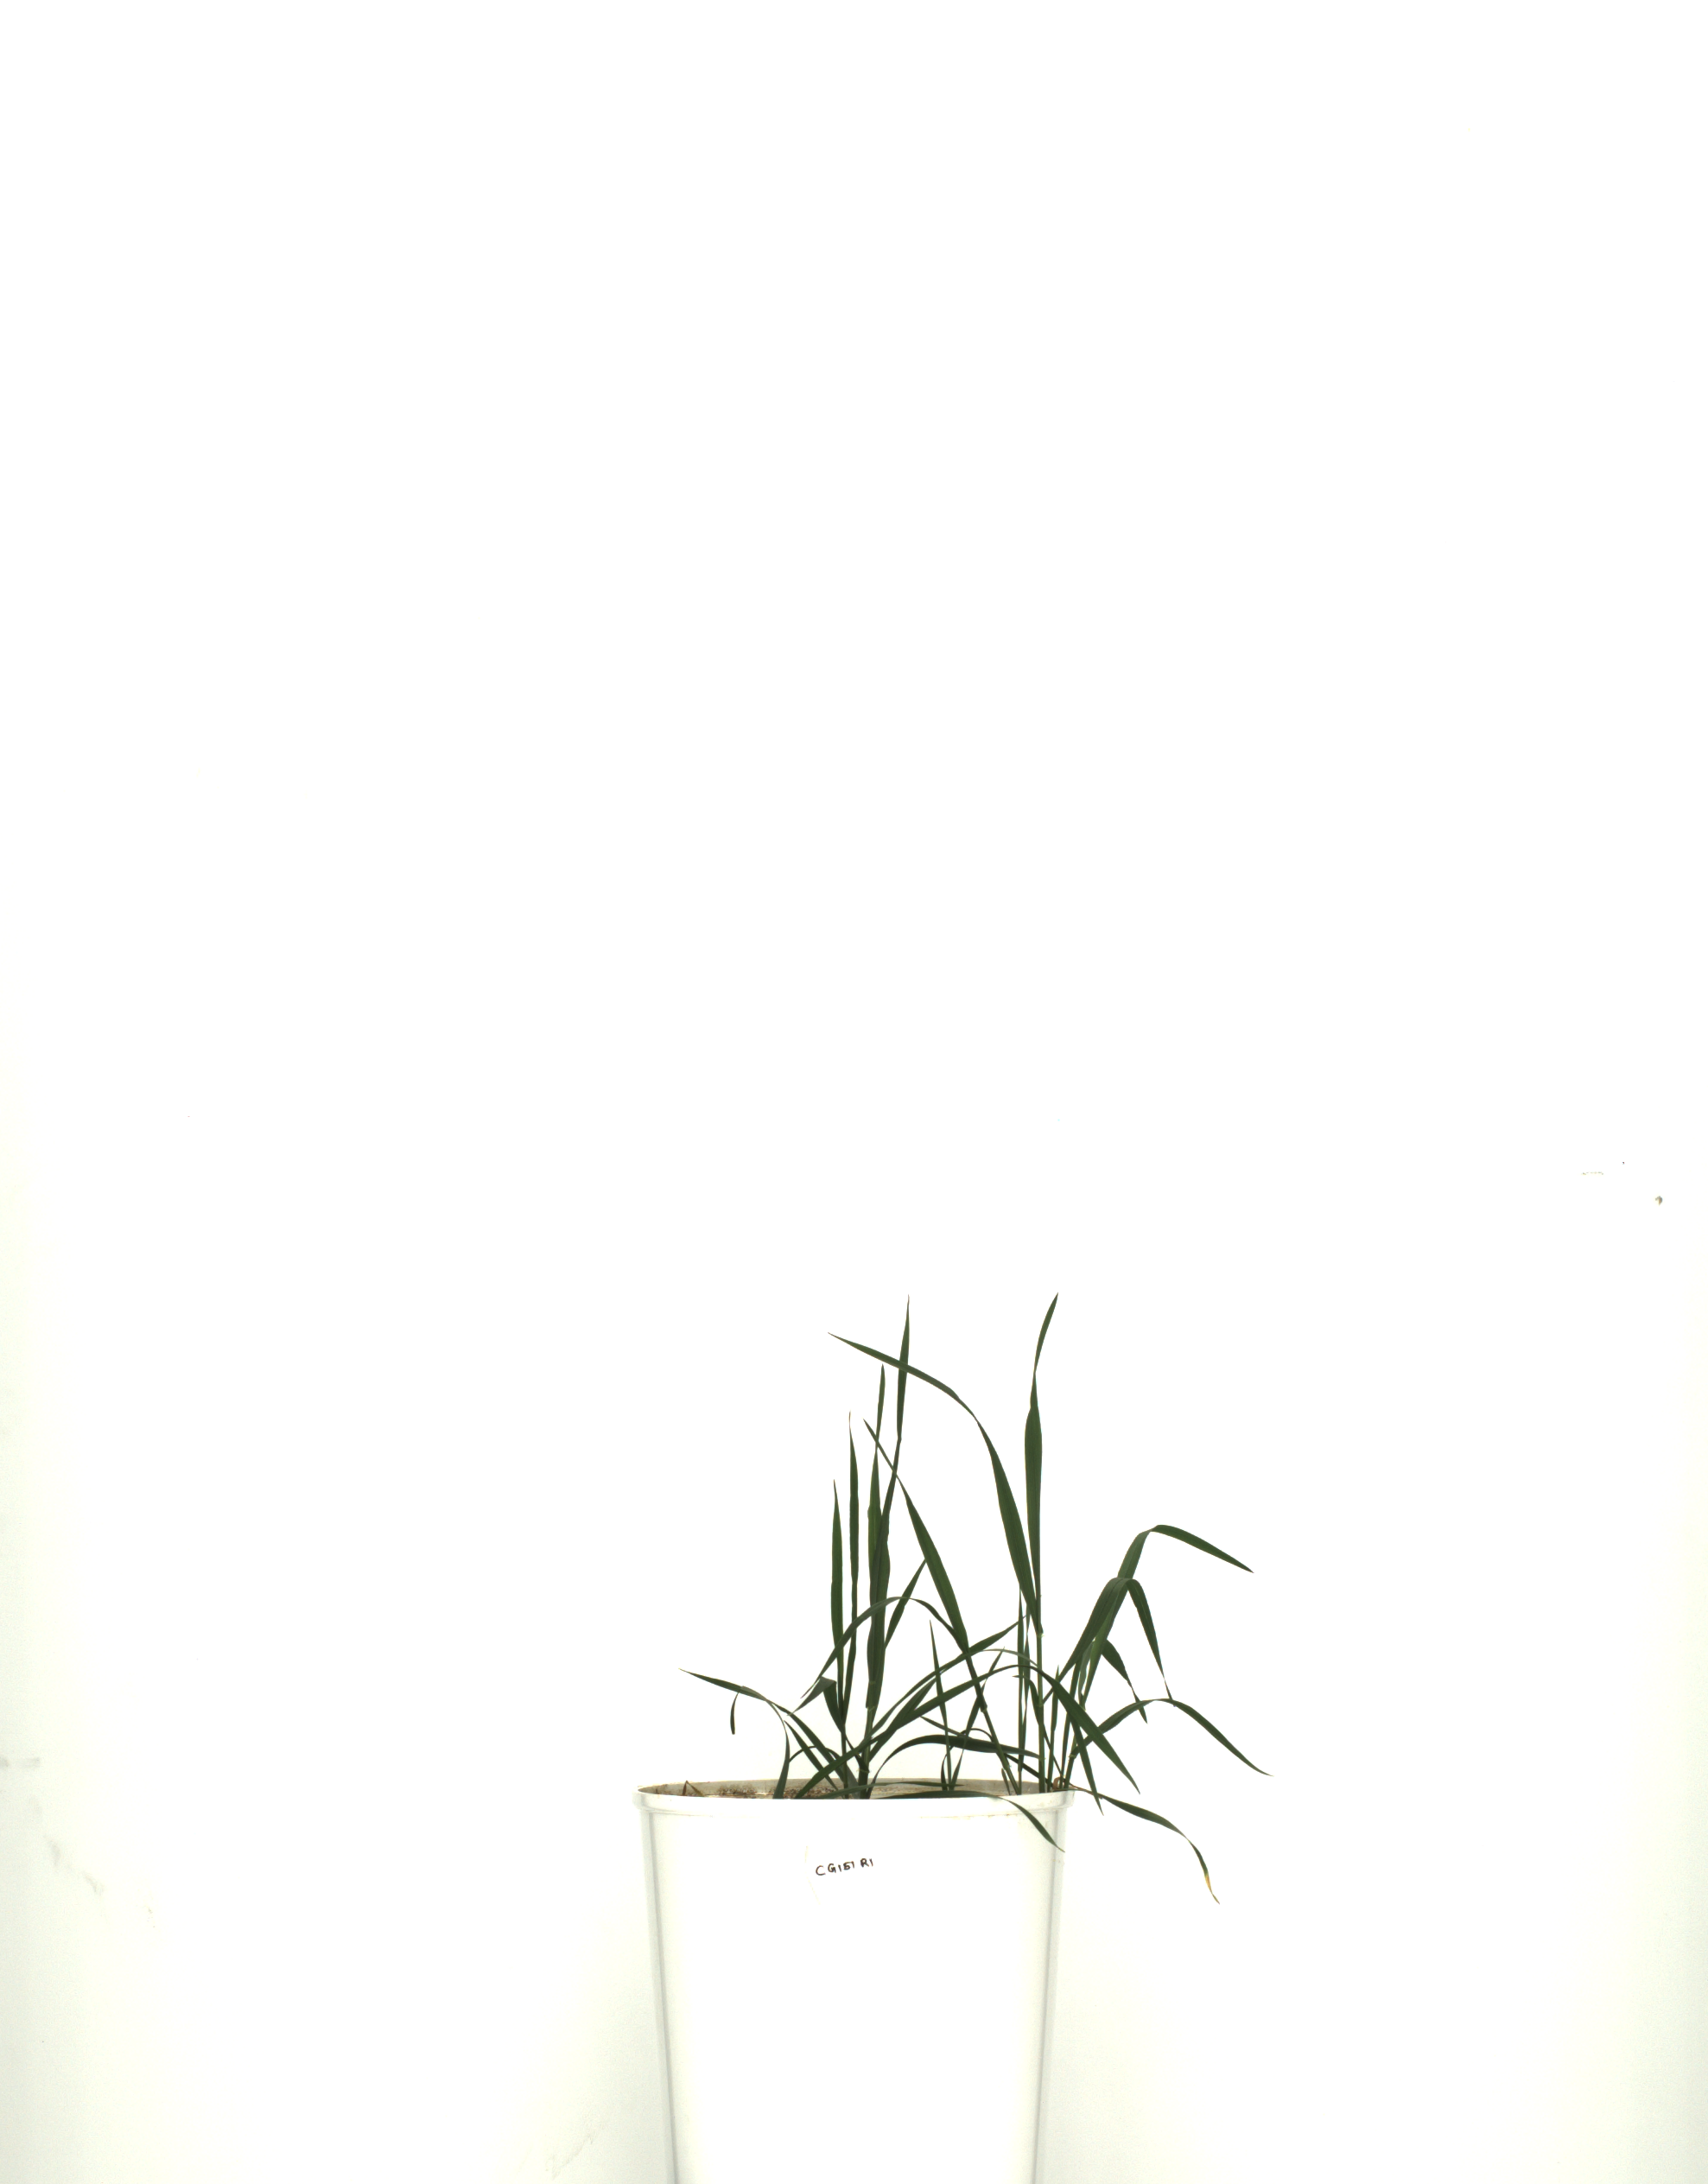

Green Only Image


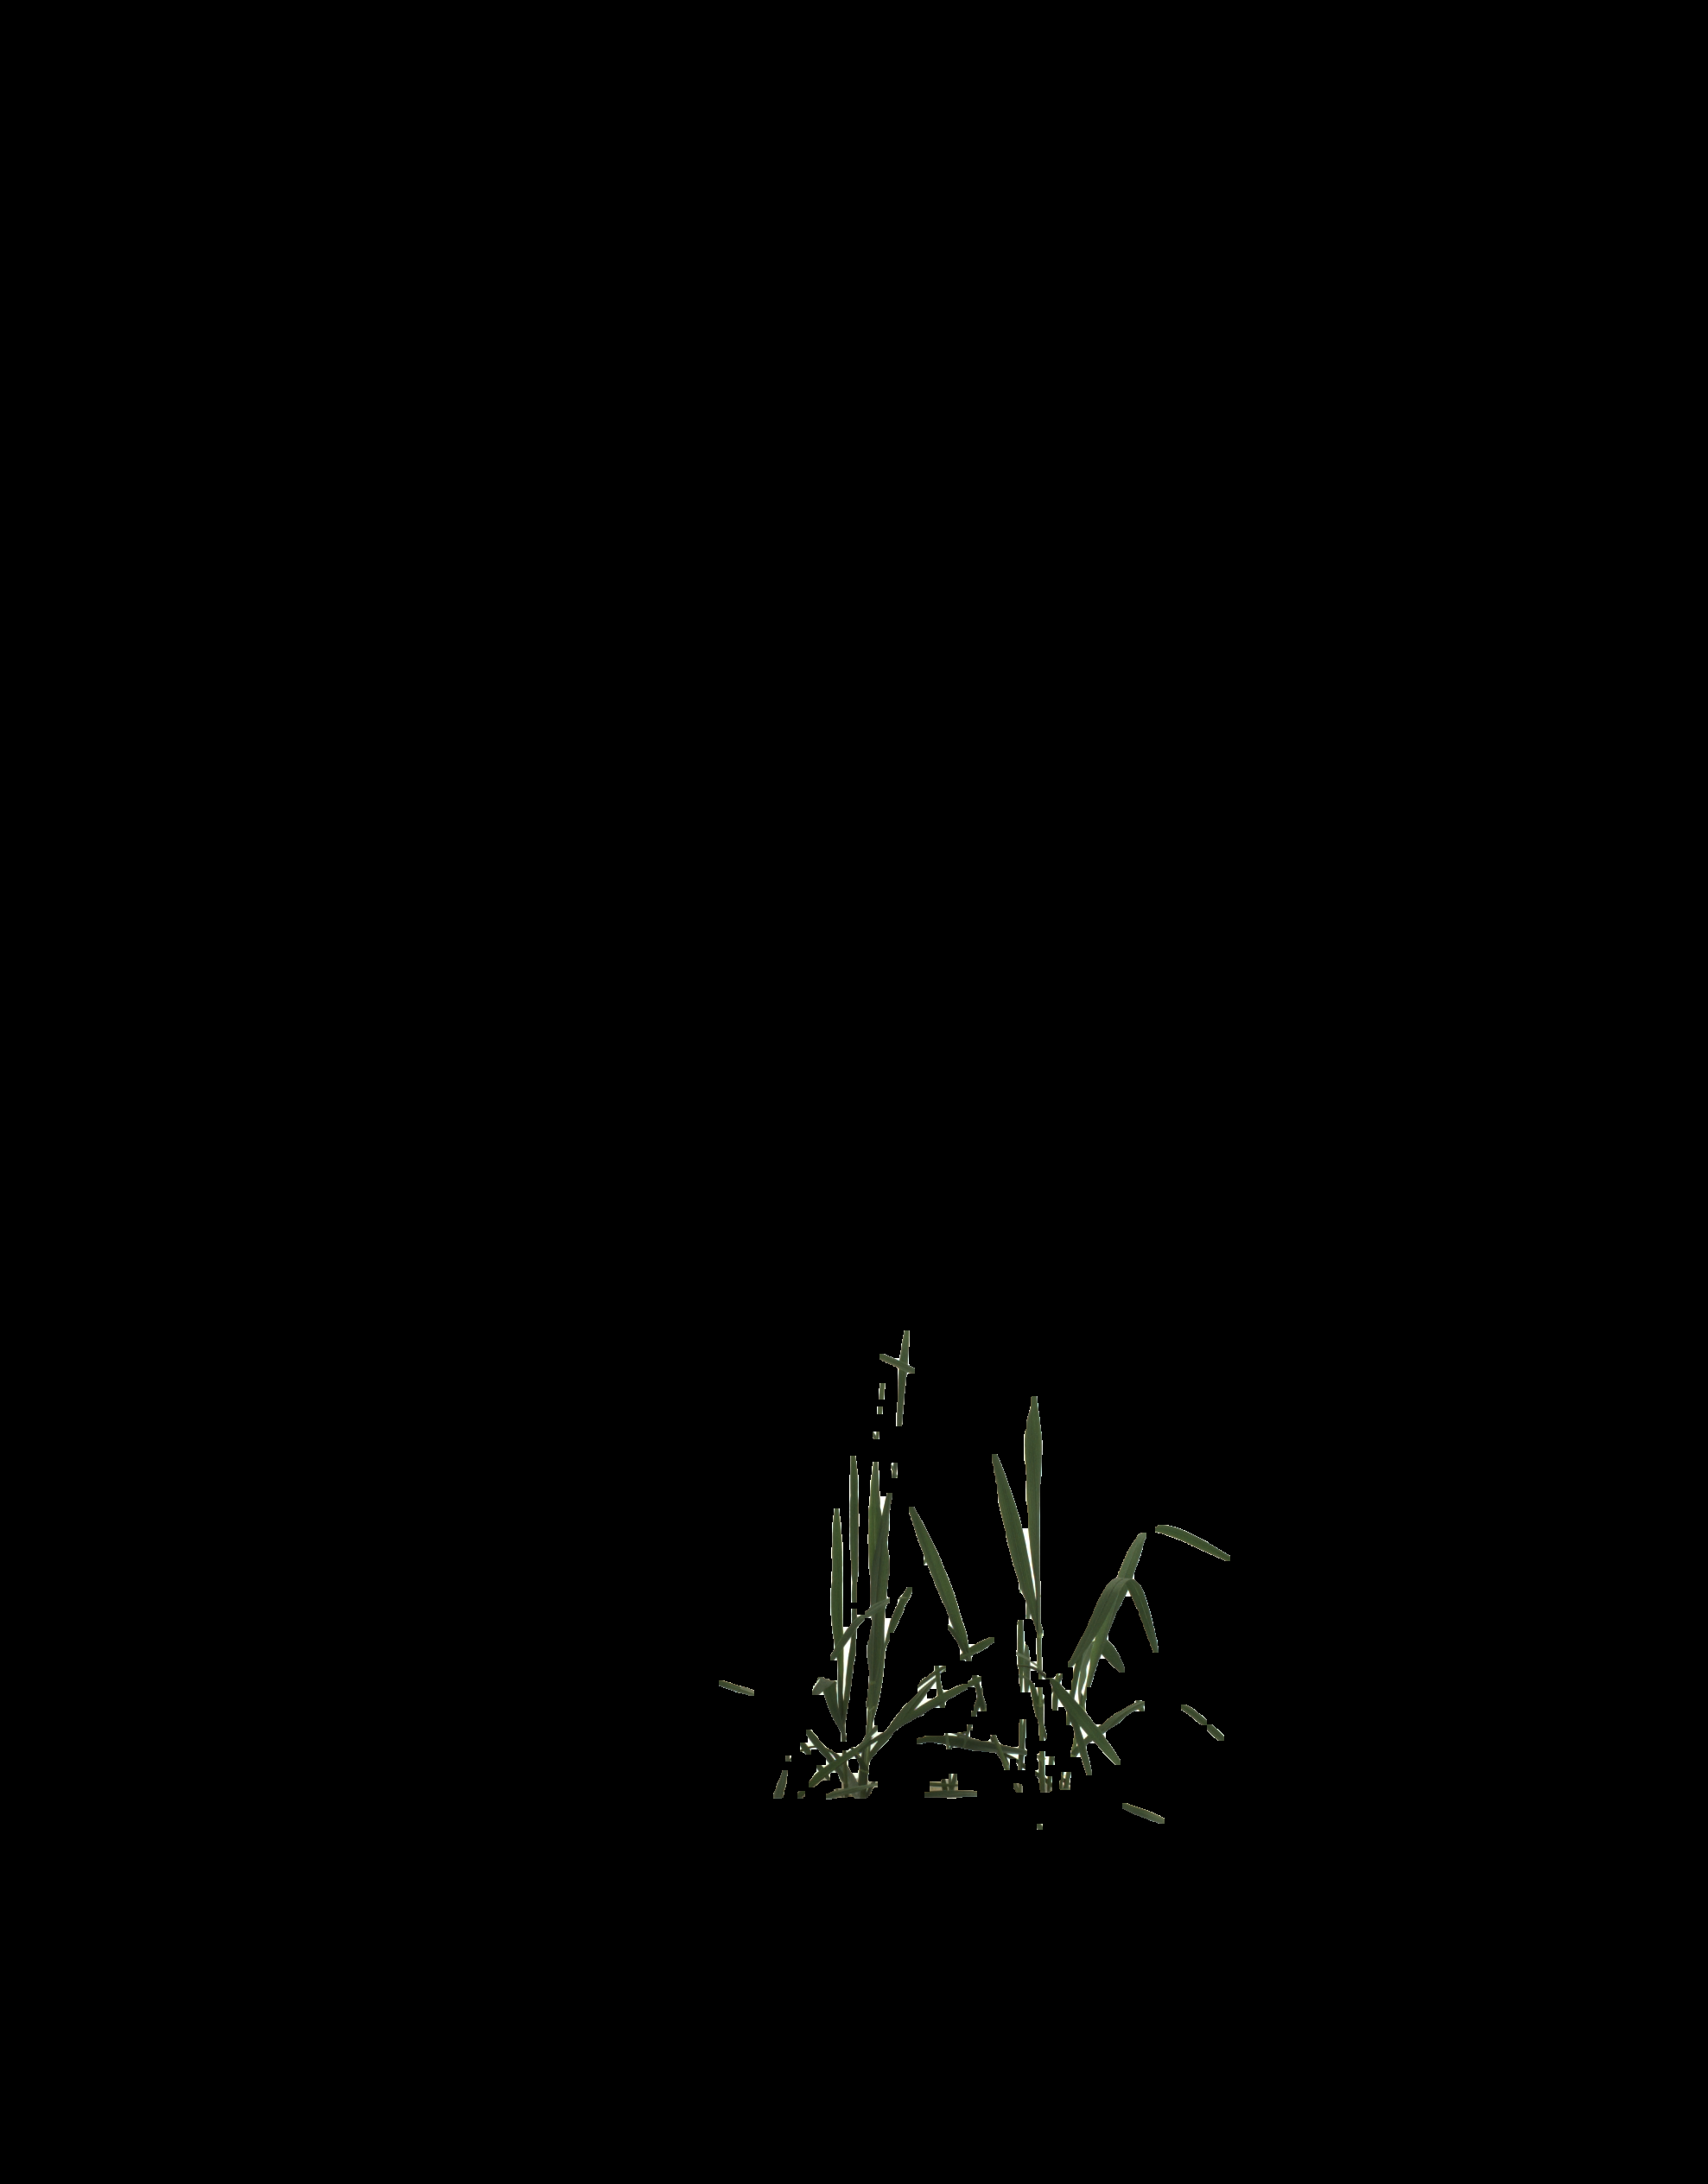

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/drive/MyDrive/IMAGEprossing/0_0_0.png")

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the green color in HSV
# These values are adjusted to capture a wider range of green shades
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

# Create a mask that includes only the green parts of the image
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply bilateral filter to reduce noise while keeping edges sharp
filtered_mask = cv2.bilateralFilter(mask, 9, 75, 75)

# Apply morphological operations to remove small noise and fill gaps
kernel = np.ones((7, 7), np.uint8)  # Larger kernel for more effective noise removal
mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # Fill gaps

# Apply the mask to the original image to extract the green parts
green_only = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the green-only image
print('Original Image')
cv2_imshow(image)

print('Green Only Image')
cv2_imshow(green_only)


**bold text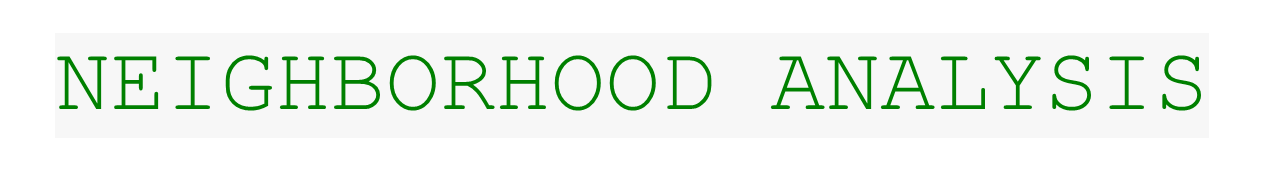**

Original Image


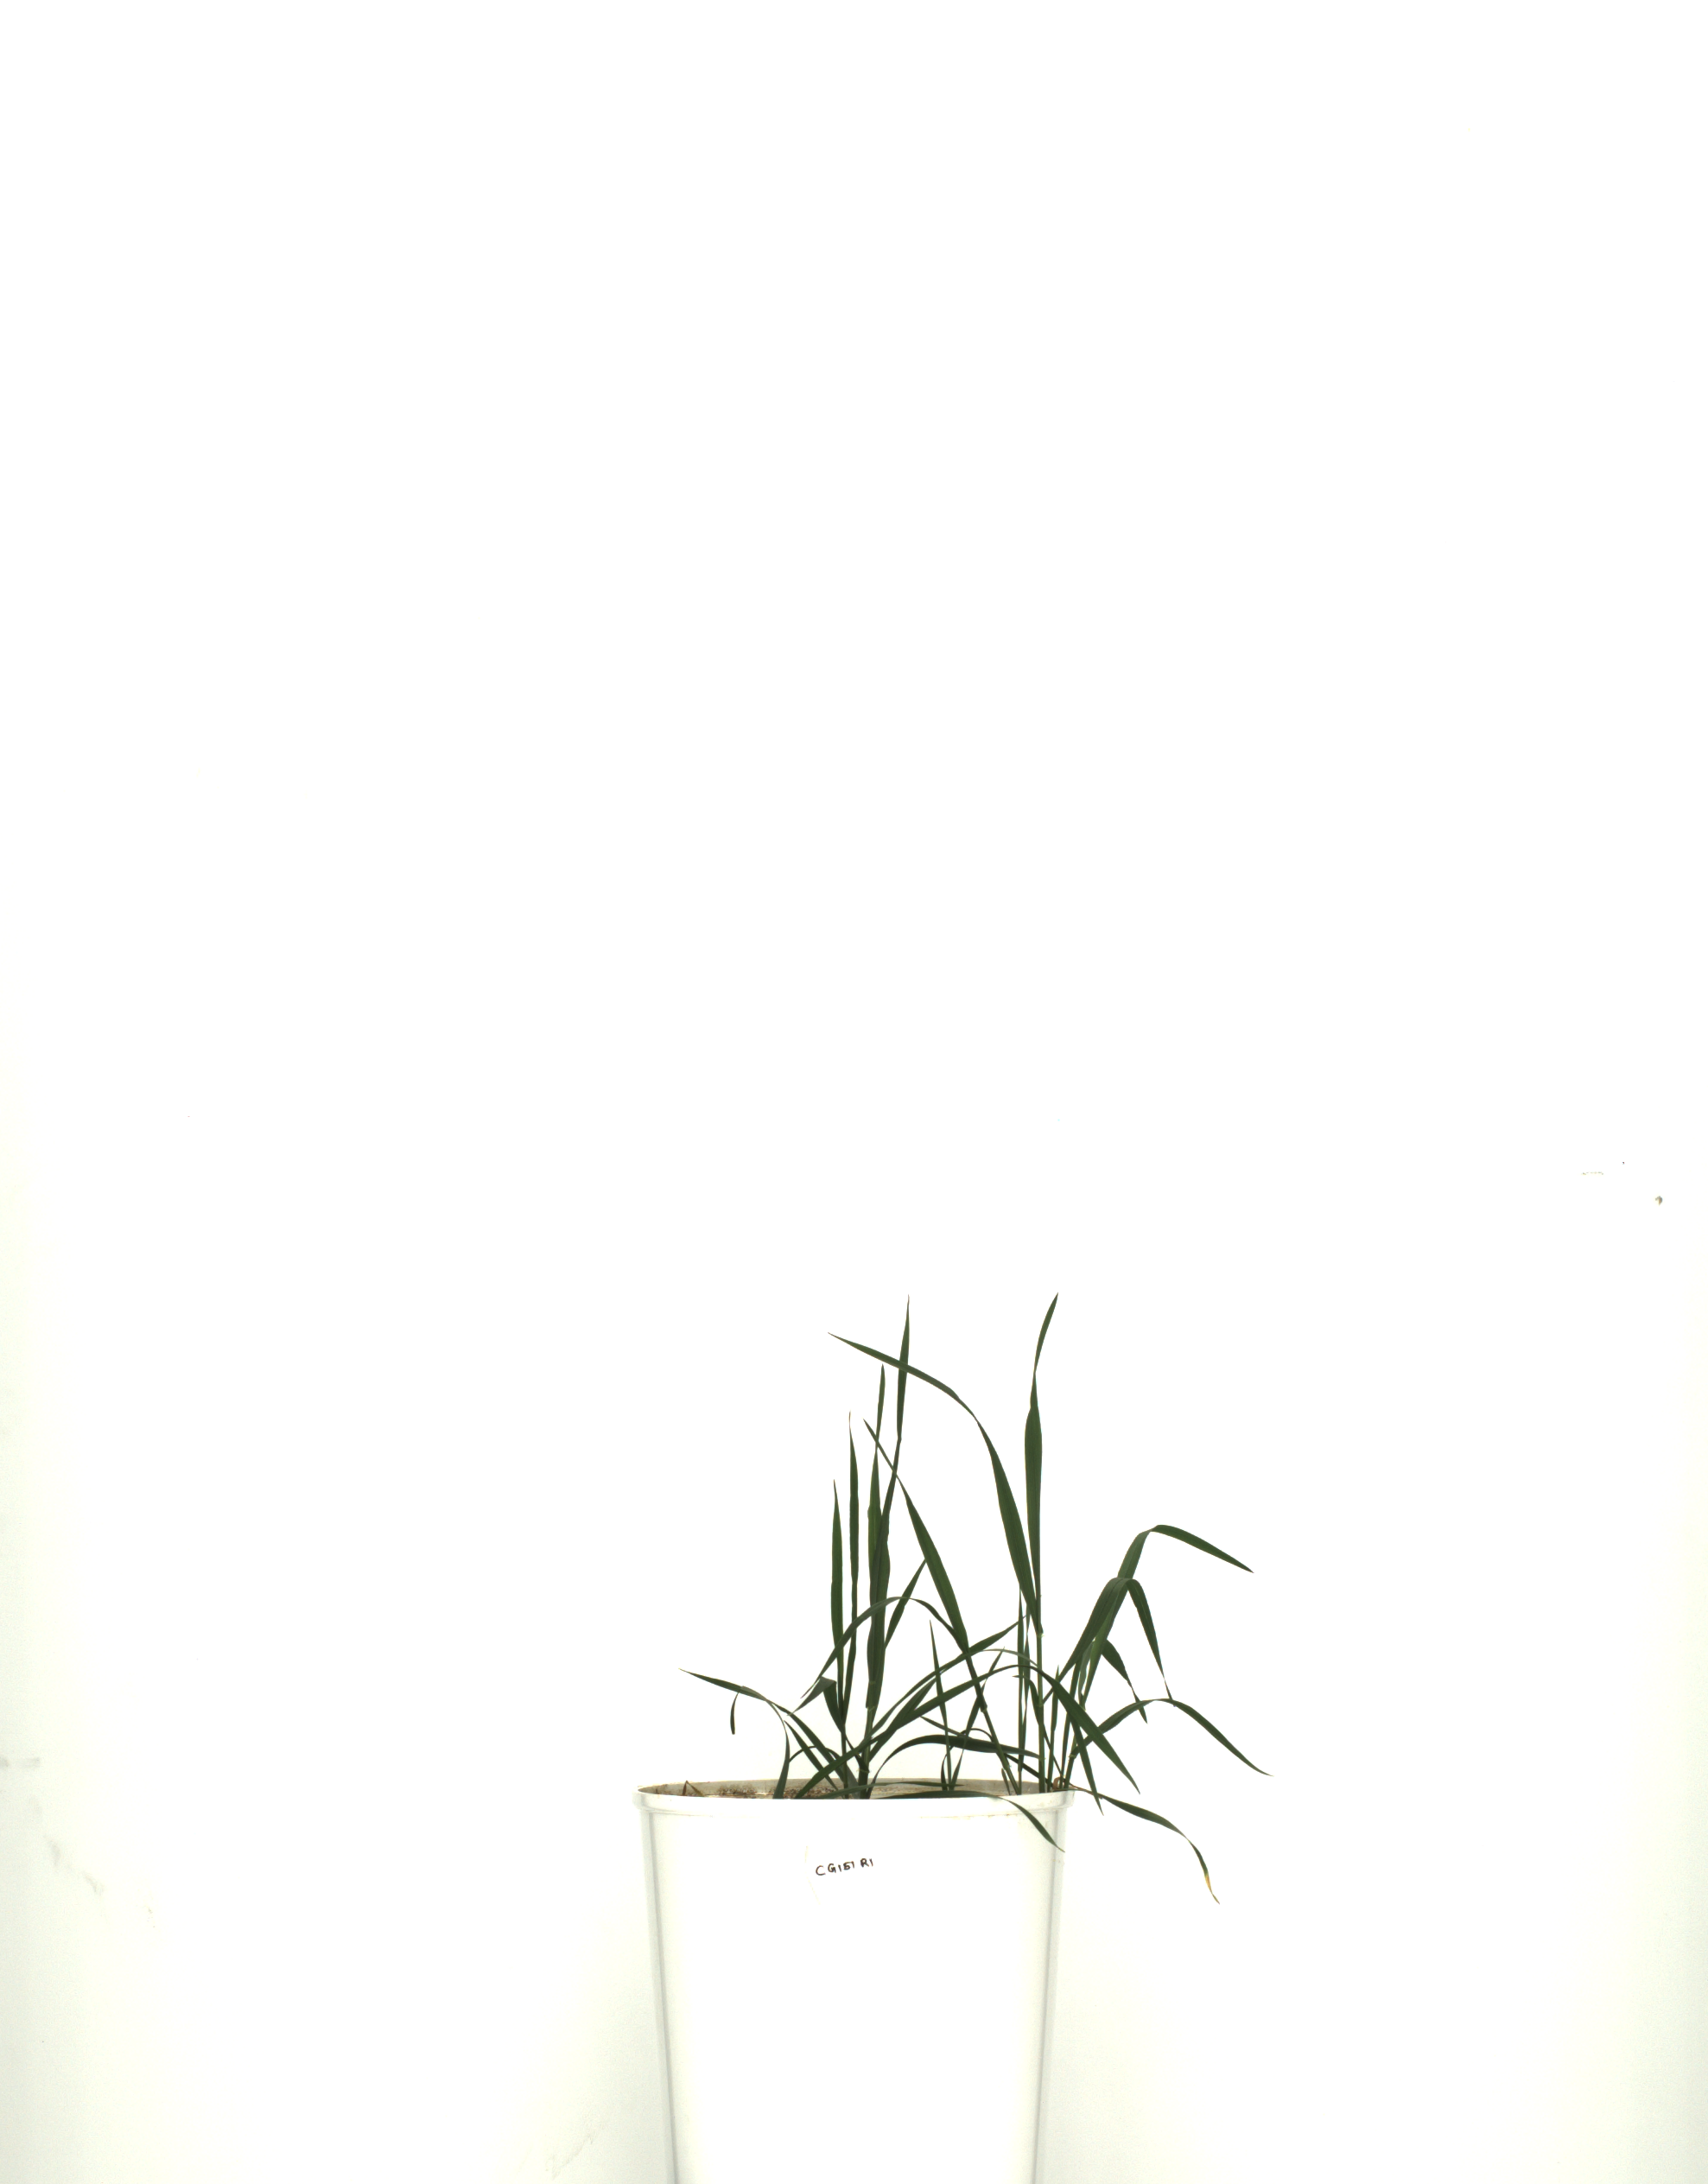

Segmented Green


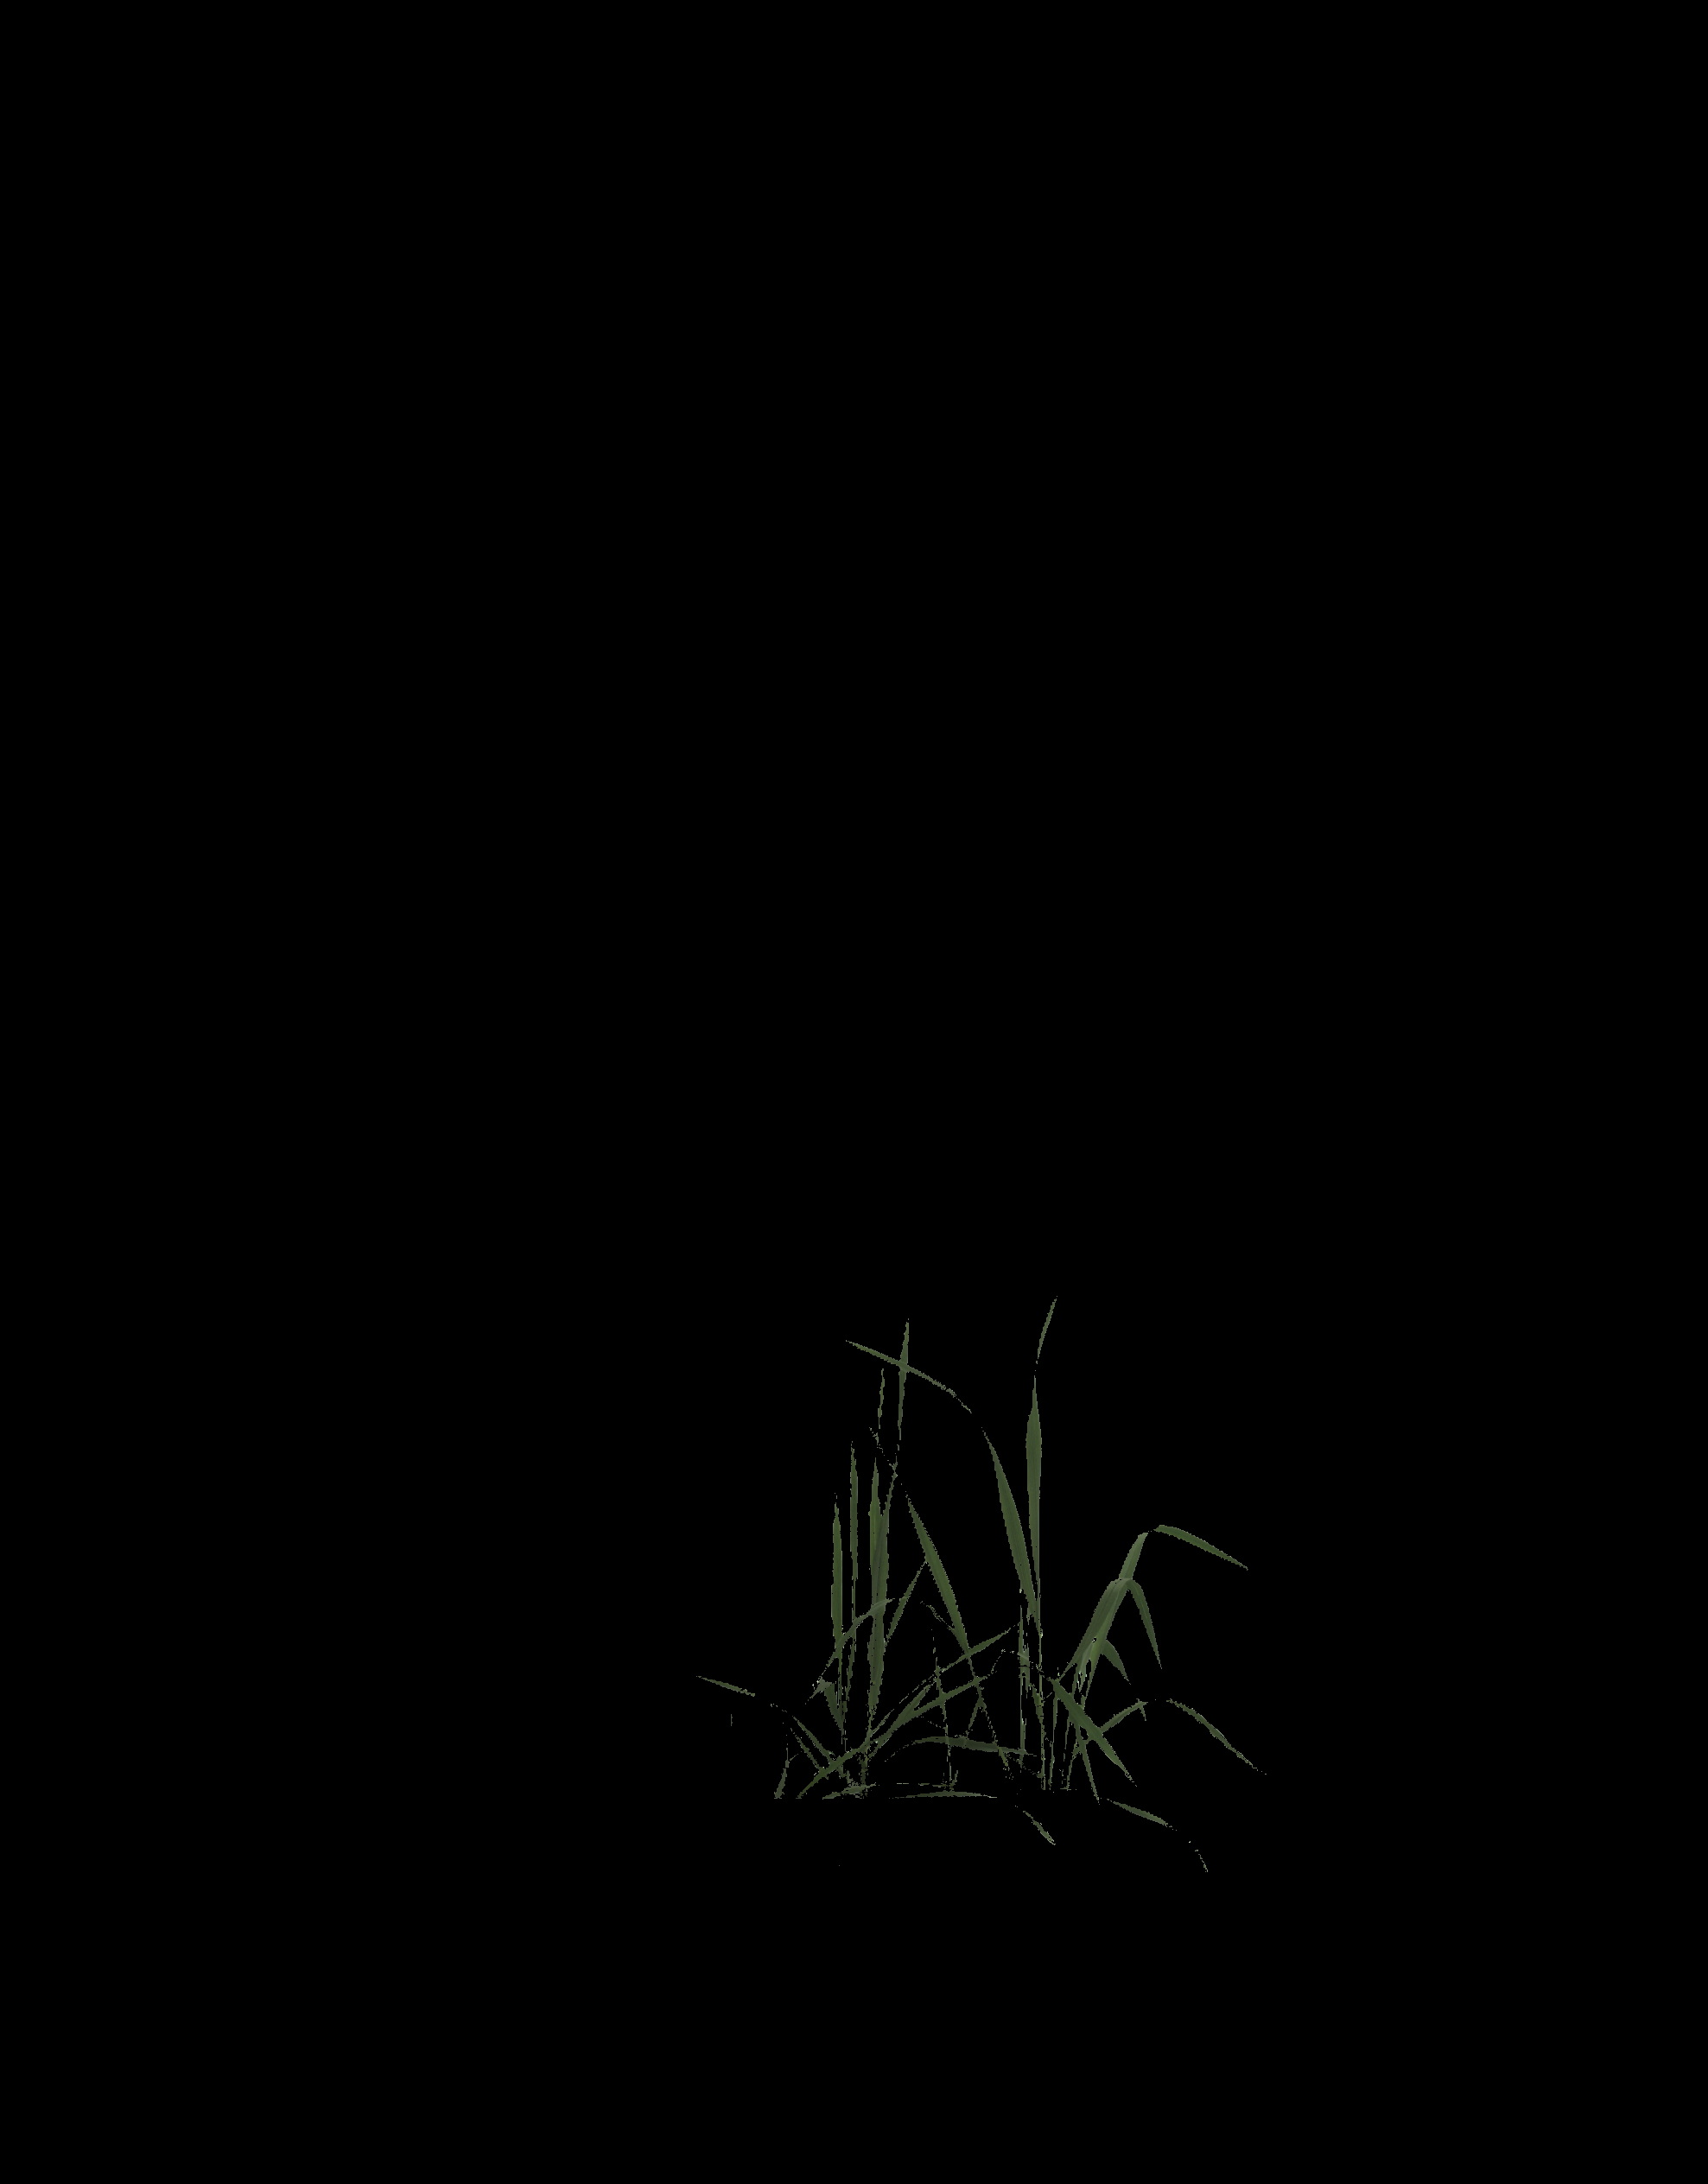

Refined Image


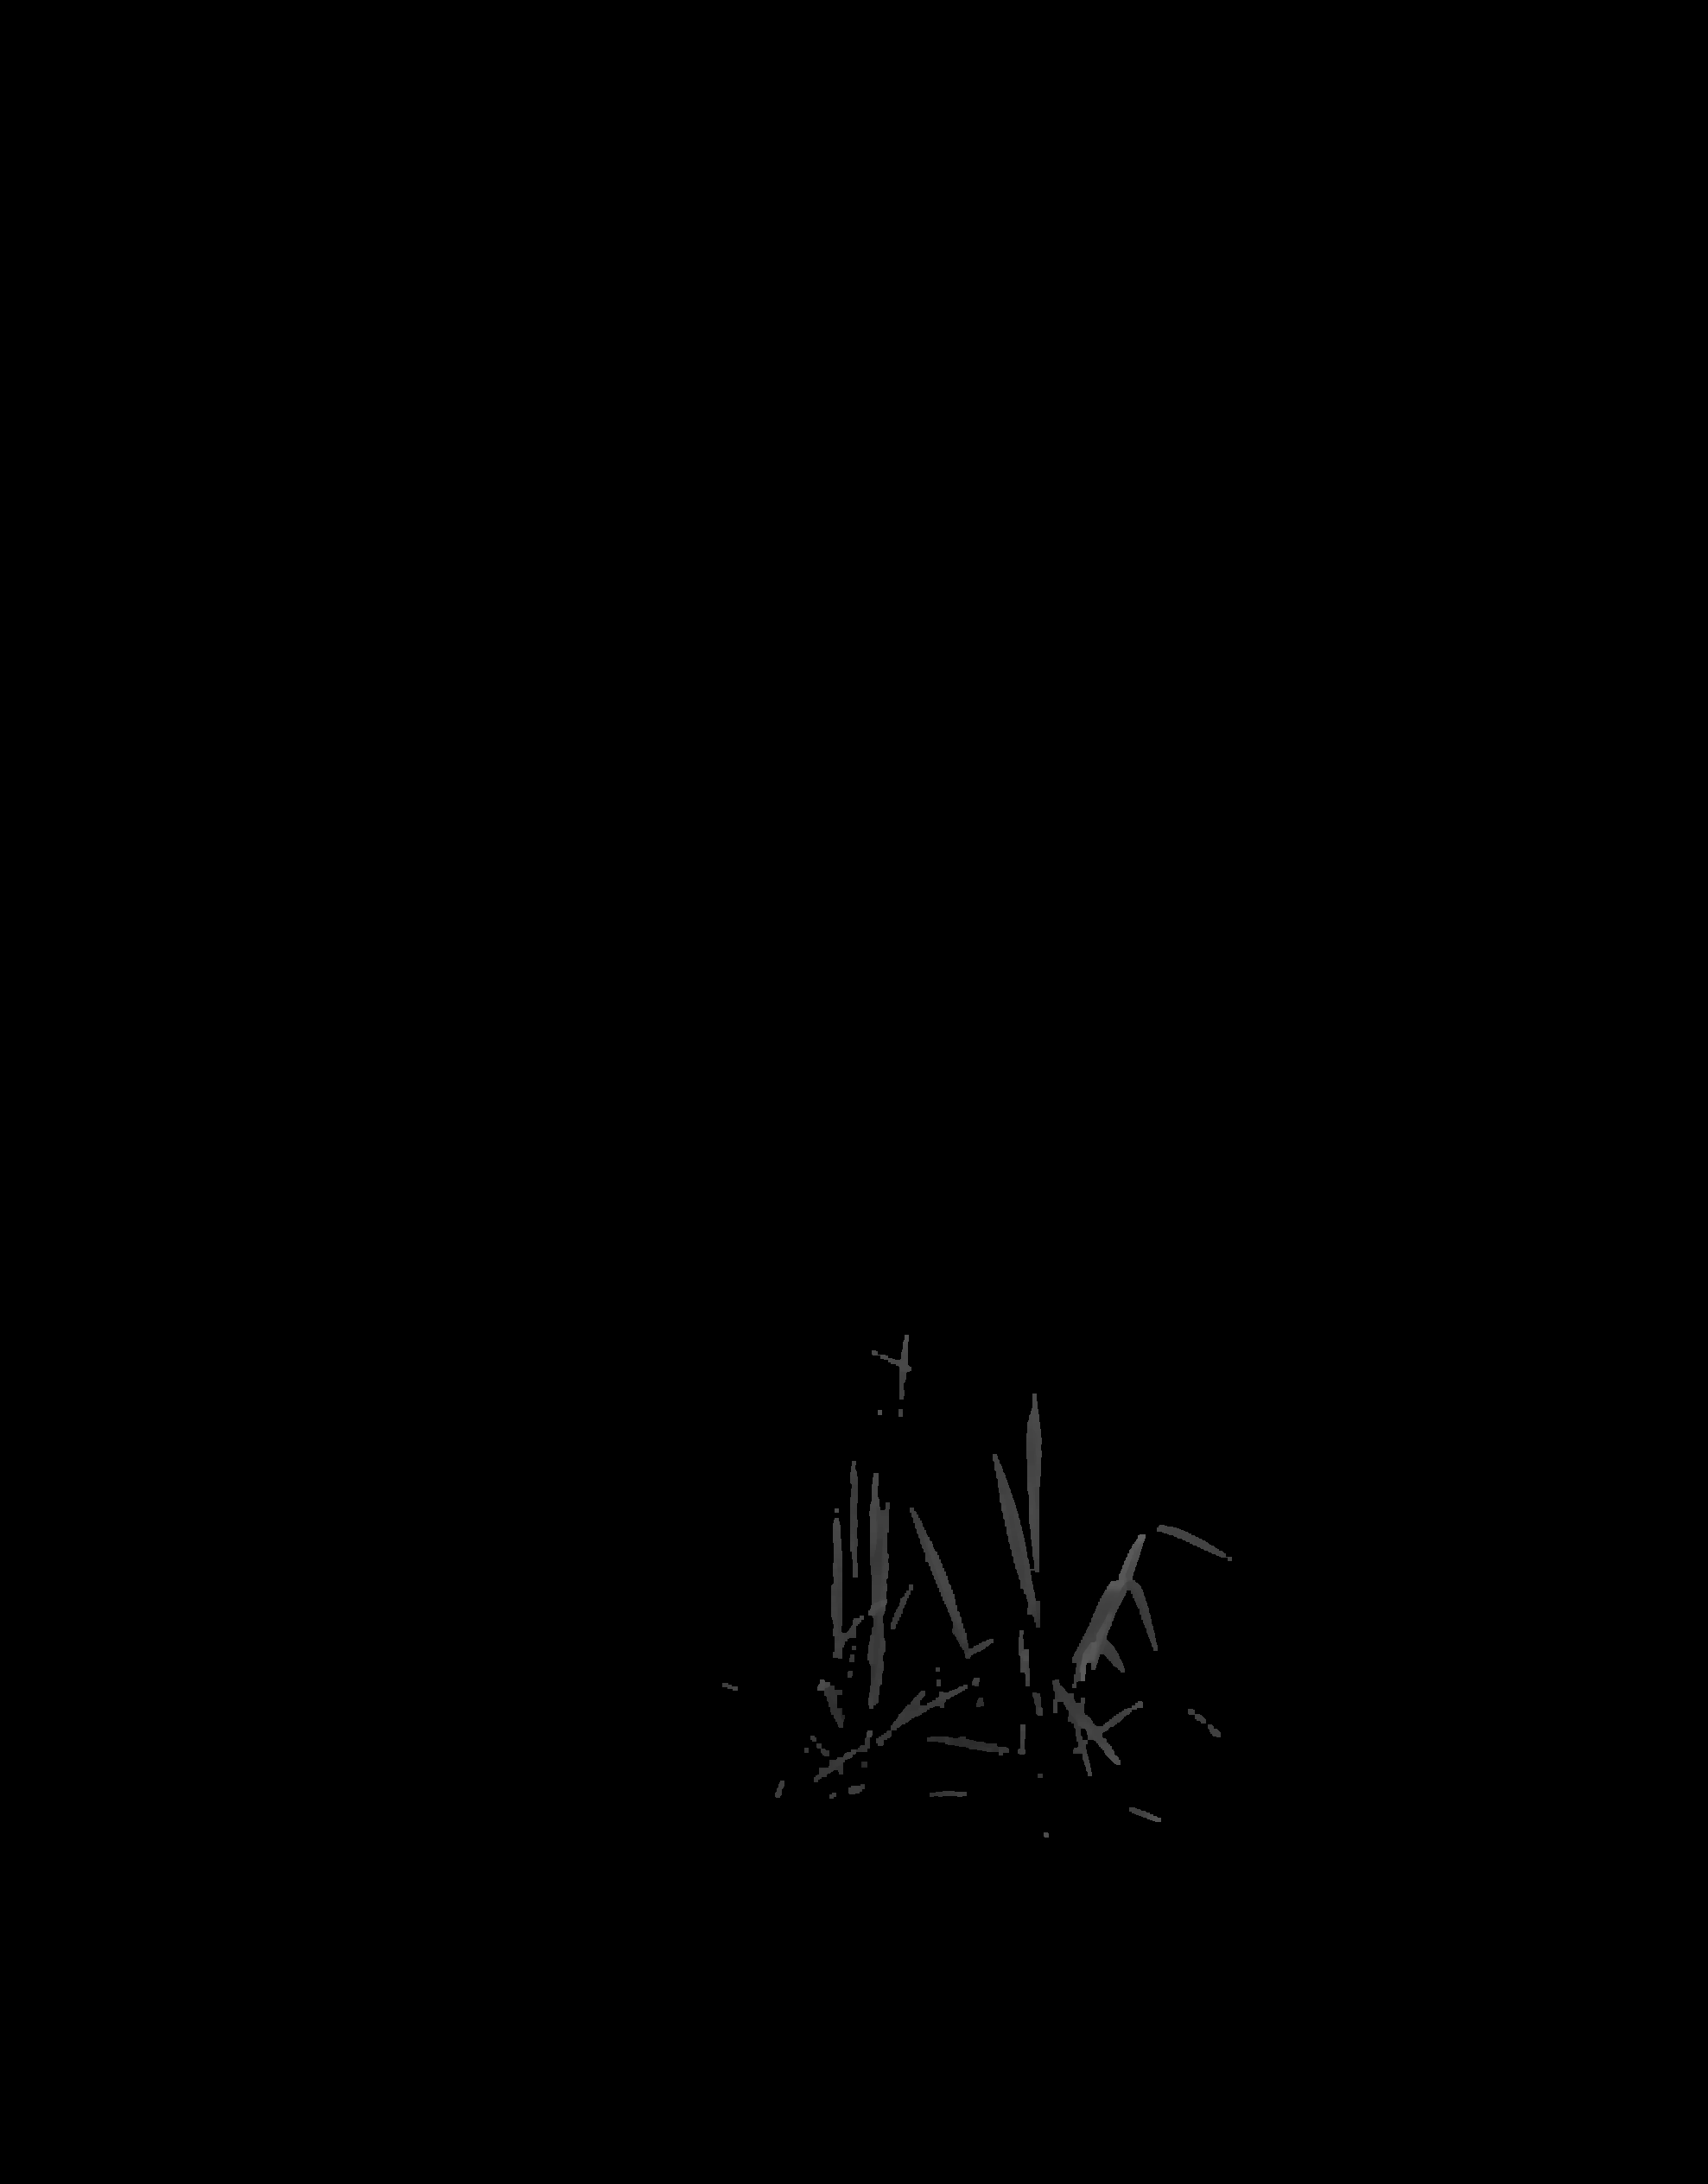

Neighborhood Analysis


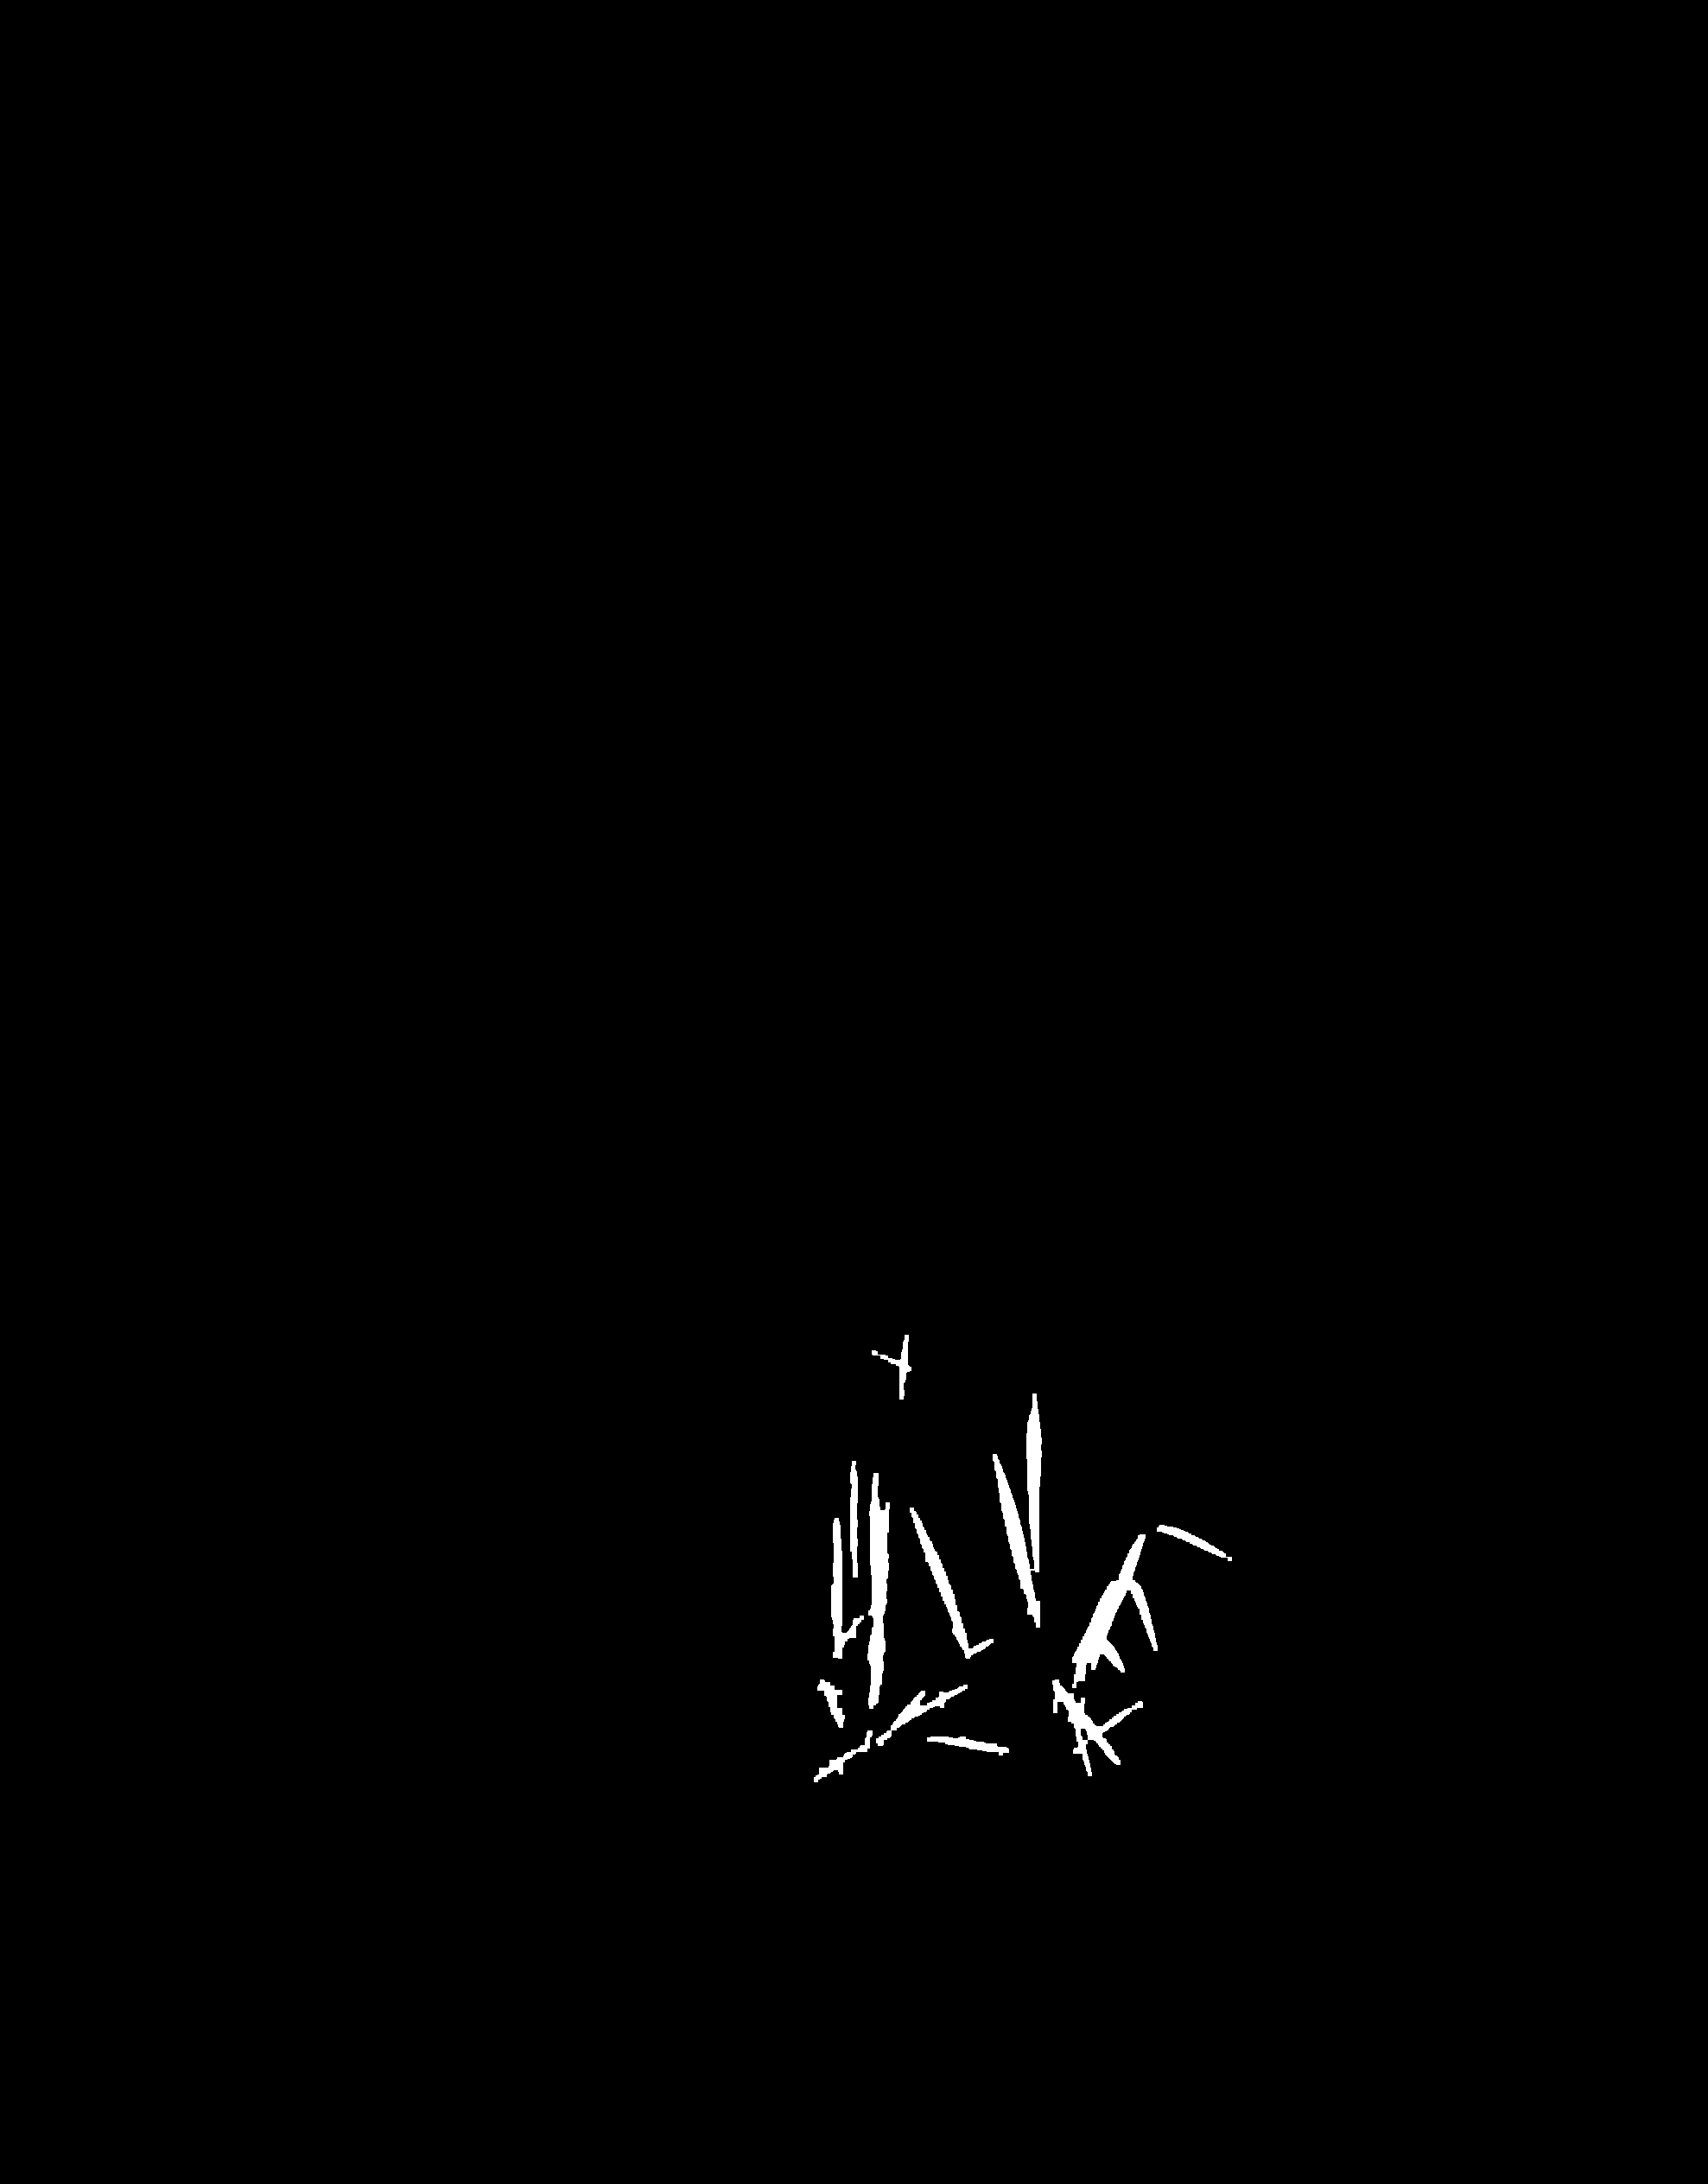

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Function to segment the green region in an RGB image
def segment_green(image, threshold=50):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define lower and upper bounds for green color in HSV
    lower_green = np.array([40, 40, 40])  # Adjust these values if needed
    upper_green = np.array([70, 255, 255])  # Adjust these values if needed
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    # Apply the mask to the original RGB image
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

# Function to apply morphological operations
def apply_morphological_operations(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply opening (erosion followed by dilation)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

    # Apply closing (dilation followed by erosion)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    return closing

# Function to perform neighborhood analysis
def neighborhood_analysis(image):
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Create an output image to draw the results
    output_image = np.zeros(image.shape, dtype=np.uint8)

    # Remove small components
    for i in range(1, num_labels):  # Skip the background
        if stats[i, cv2.CC_STAT_AREA] >= 500:  # Keep only large components (adjust the threshold as needed)
            output_image[labels == i] = 255

    return output_image

# Sample RGB image
image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print(f"Error: Unable to load the image at {image_path}. Please check the file path and format.")
else:
    # Segment the green region
    segmented_green = segment_green(image)

    # Apply morphological operations
    refined_image = apply_morphological_operations(segmented_green)

    # Perform neighborhood analysis
    analyzed_image = neighborhood_analysis(refined_image)

    # Show the original and processed images
    print("Original Image")
    cv2_imshow(image)

    print("Segmented Green")
    cv2_imshow(segmented_green)

    print("Refined Image")
    cv2_imshow(refined_image)

    print("Neighborhood Analysis")
    cv2_imshow(analyzed_image)


Original Image


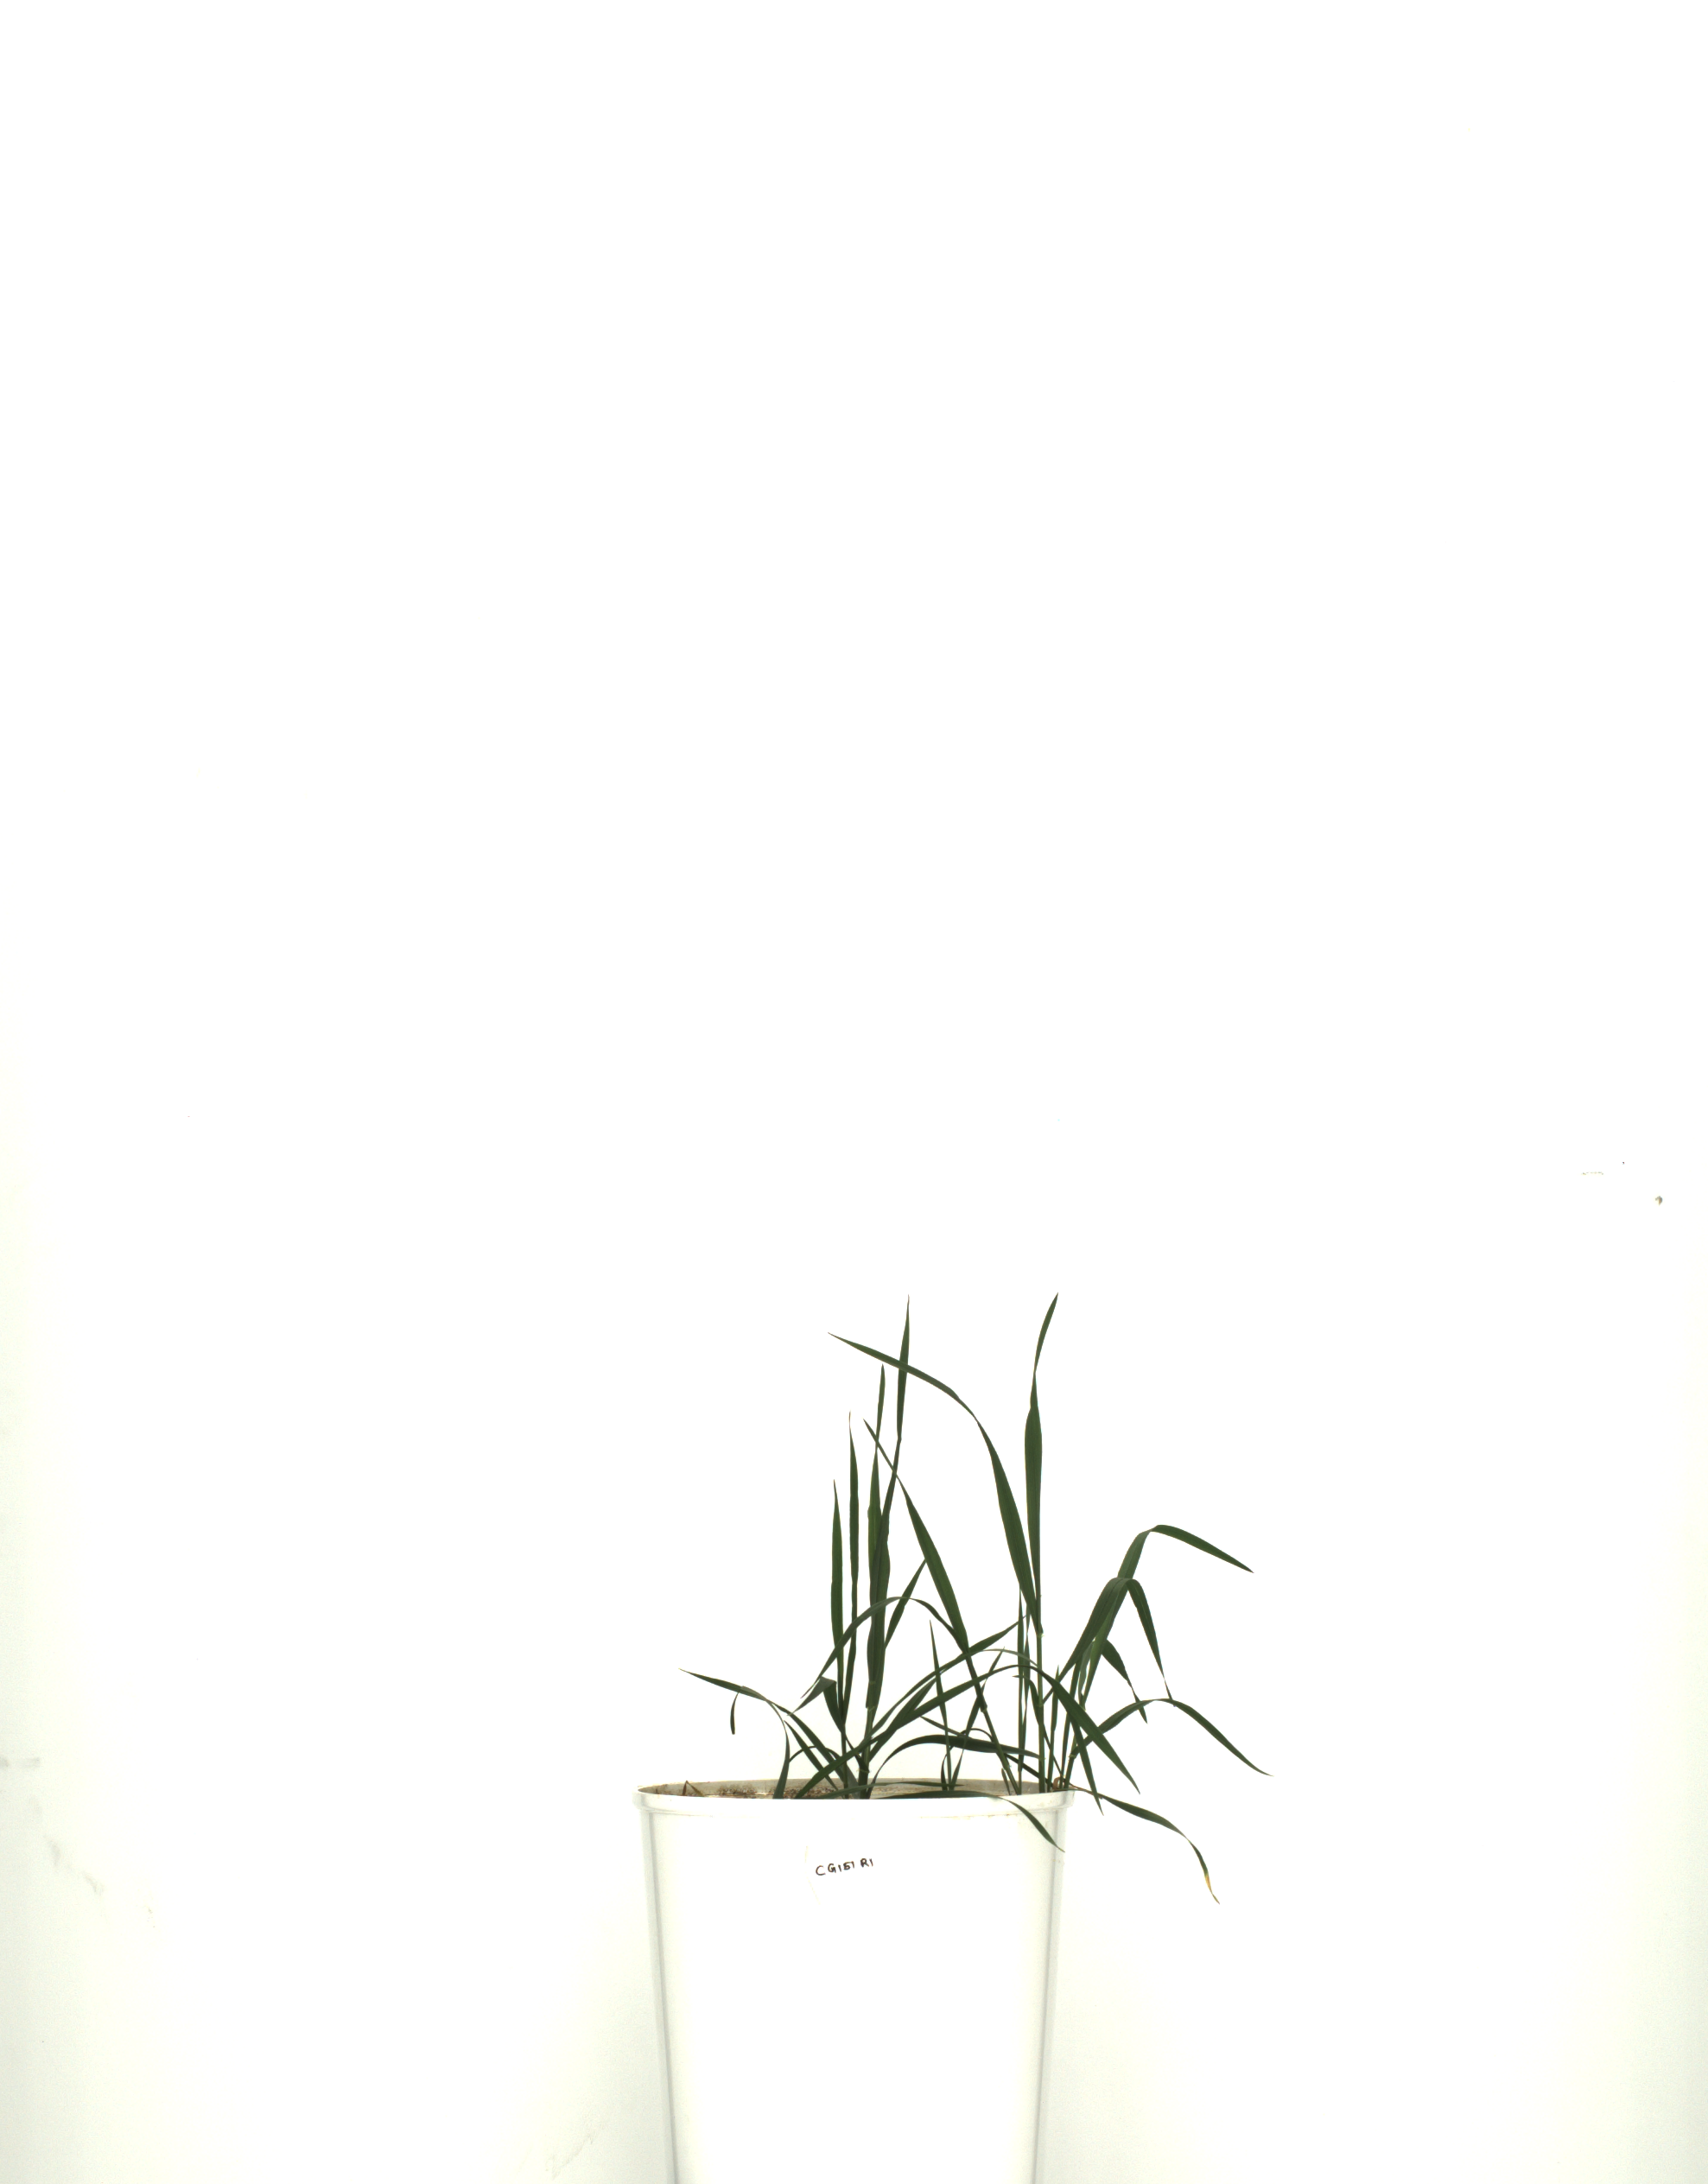

Segmented Green


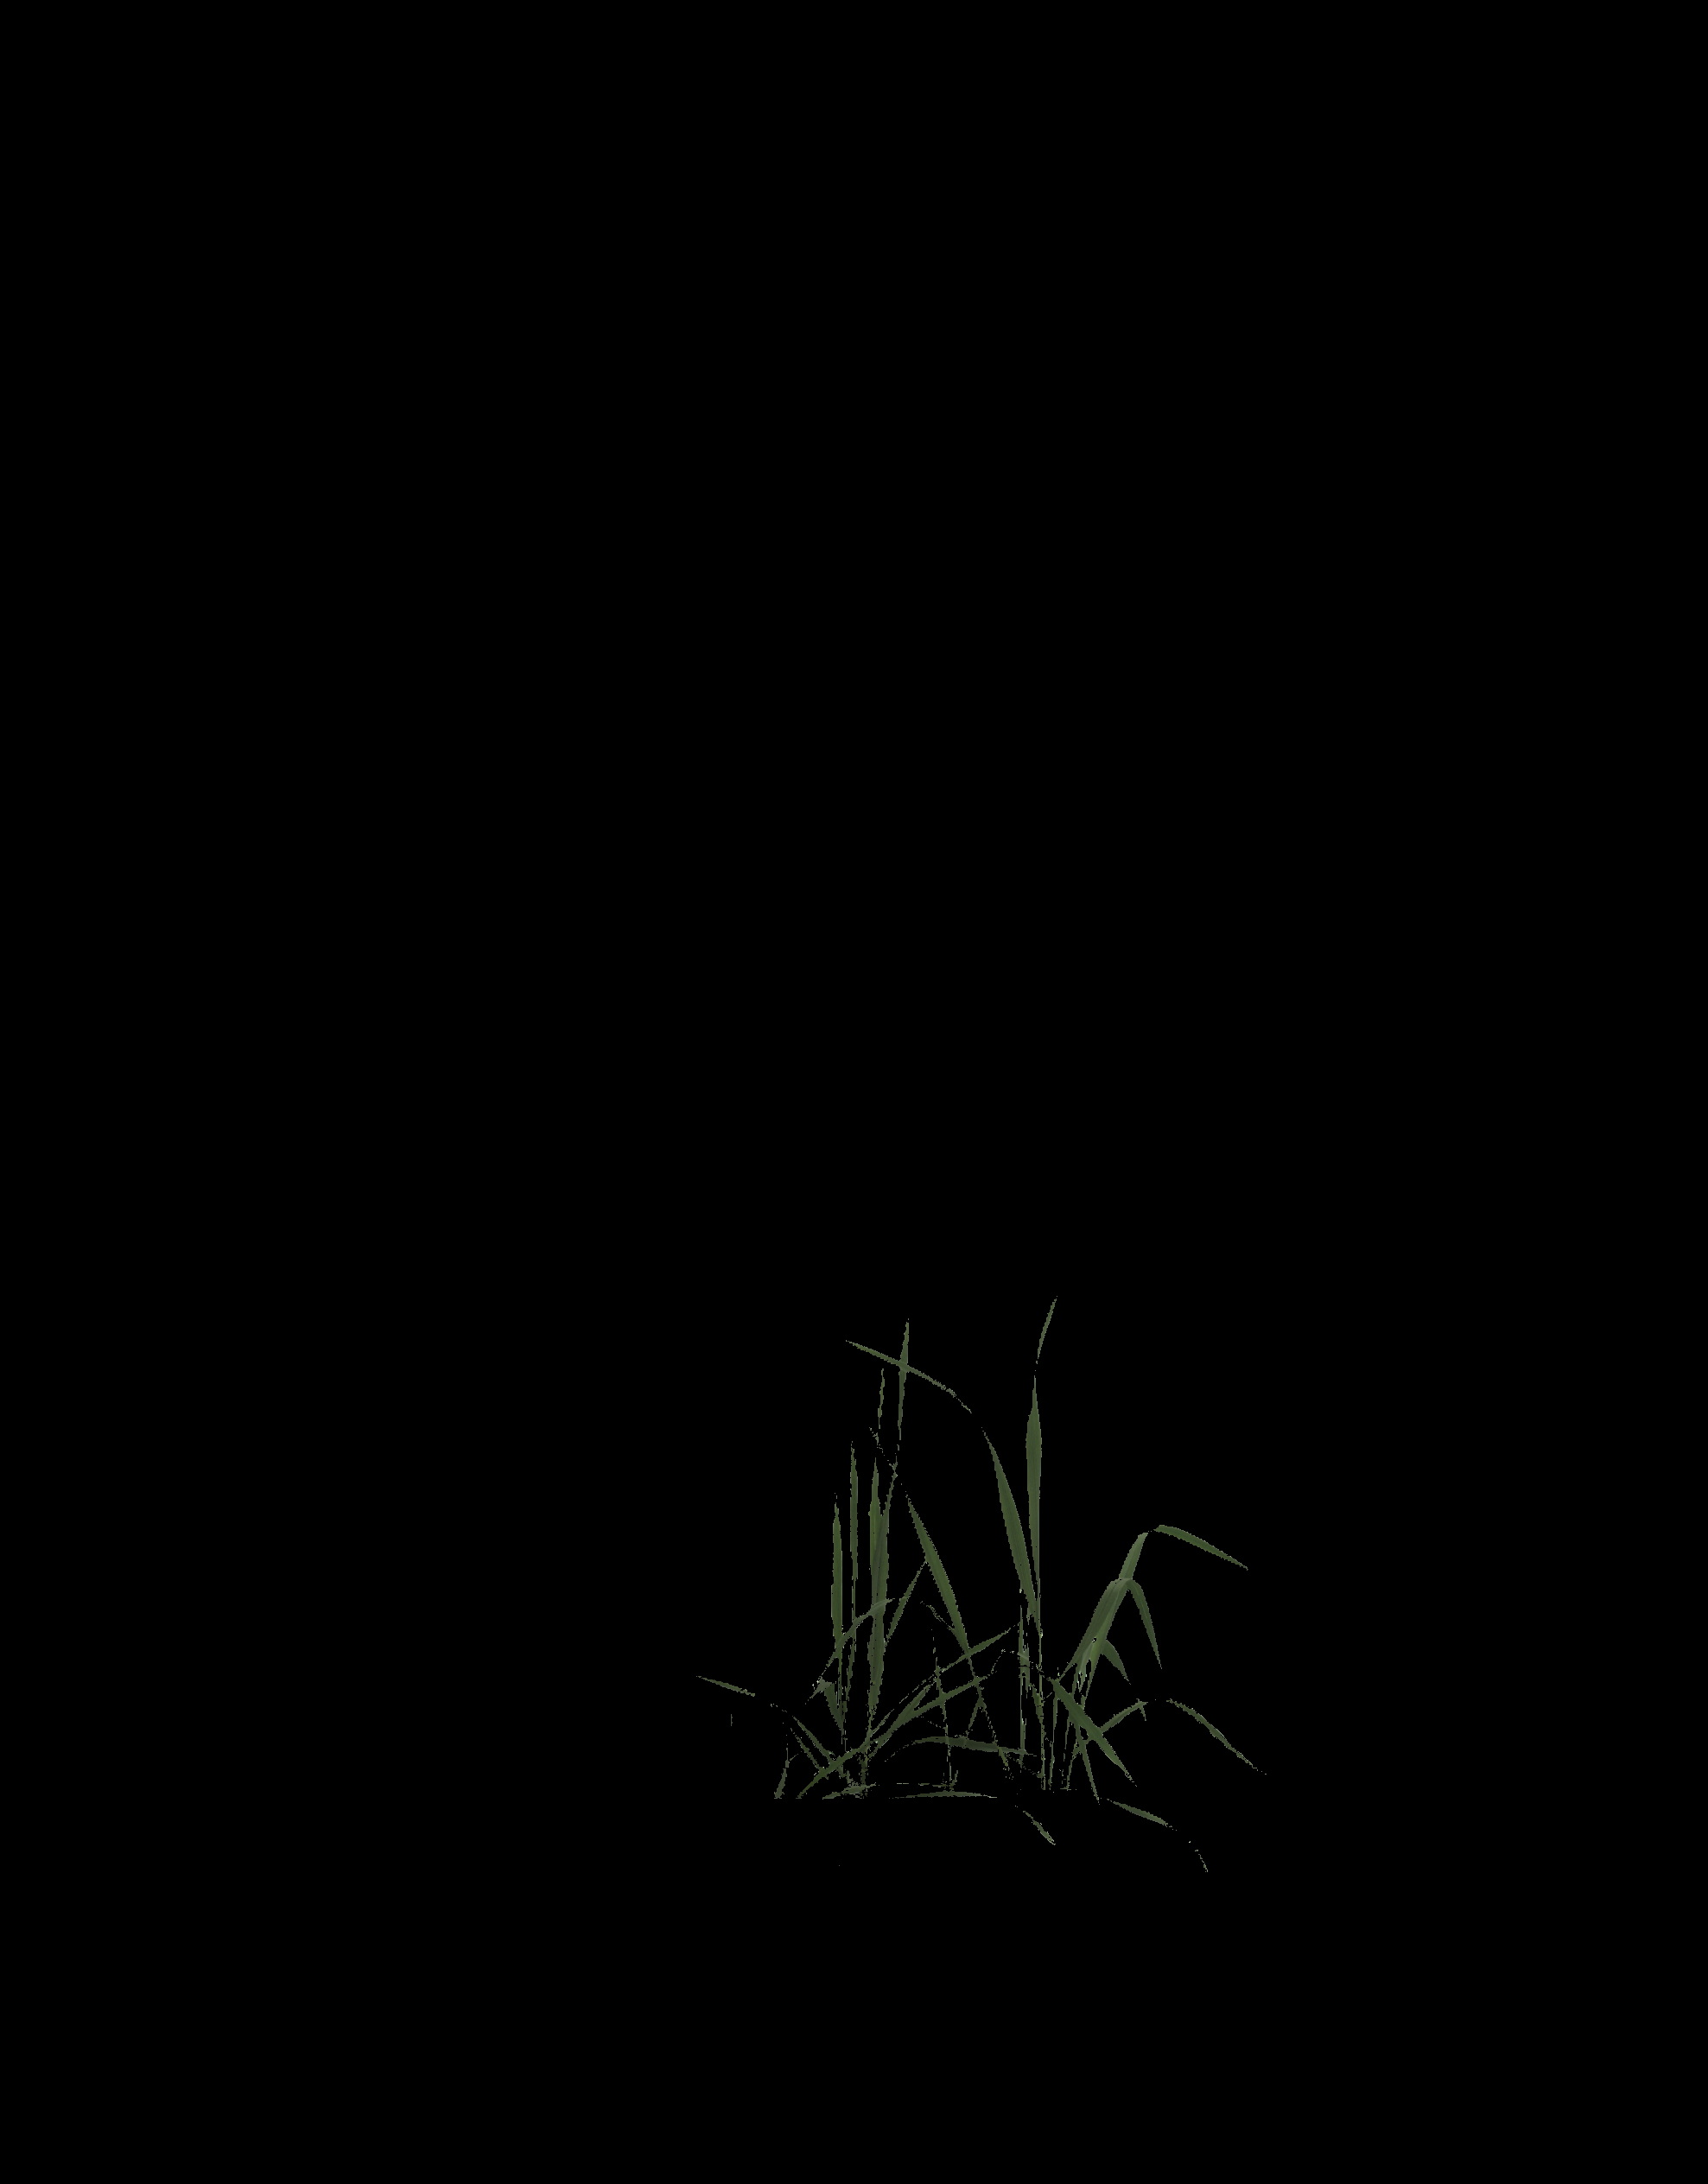

Refined Image


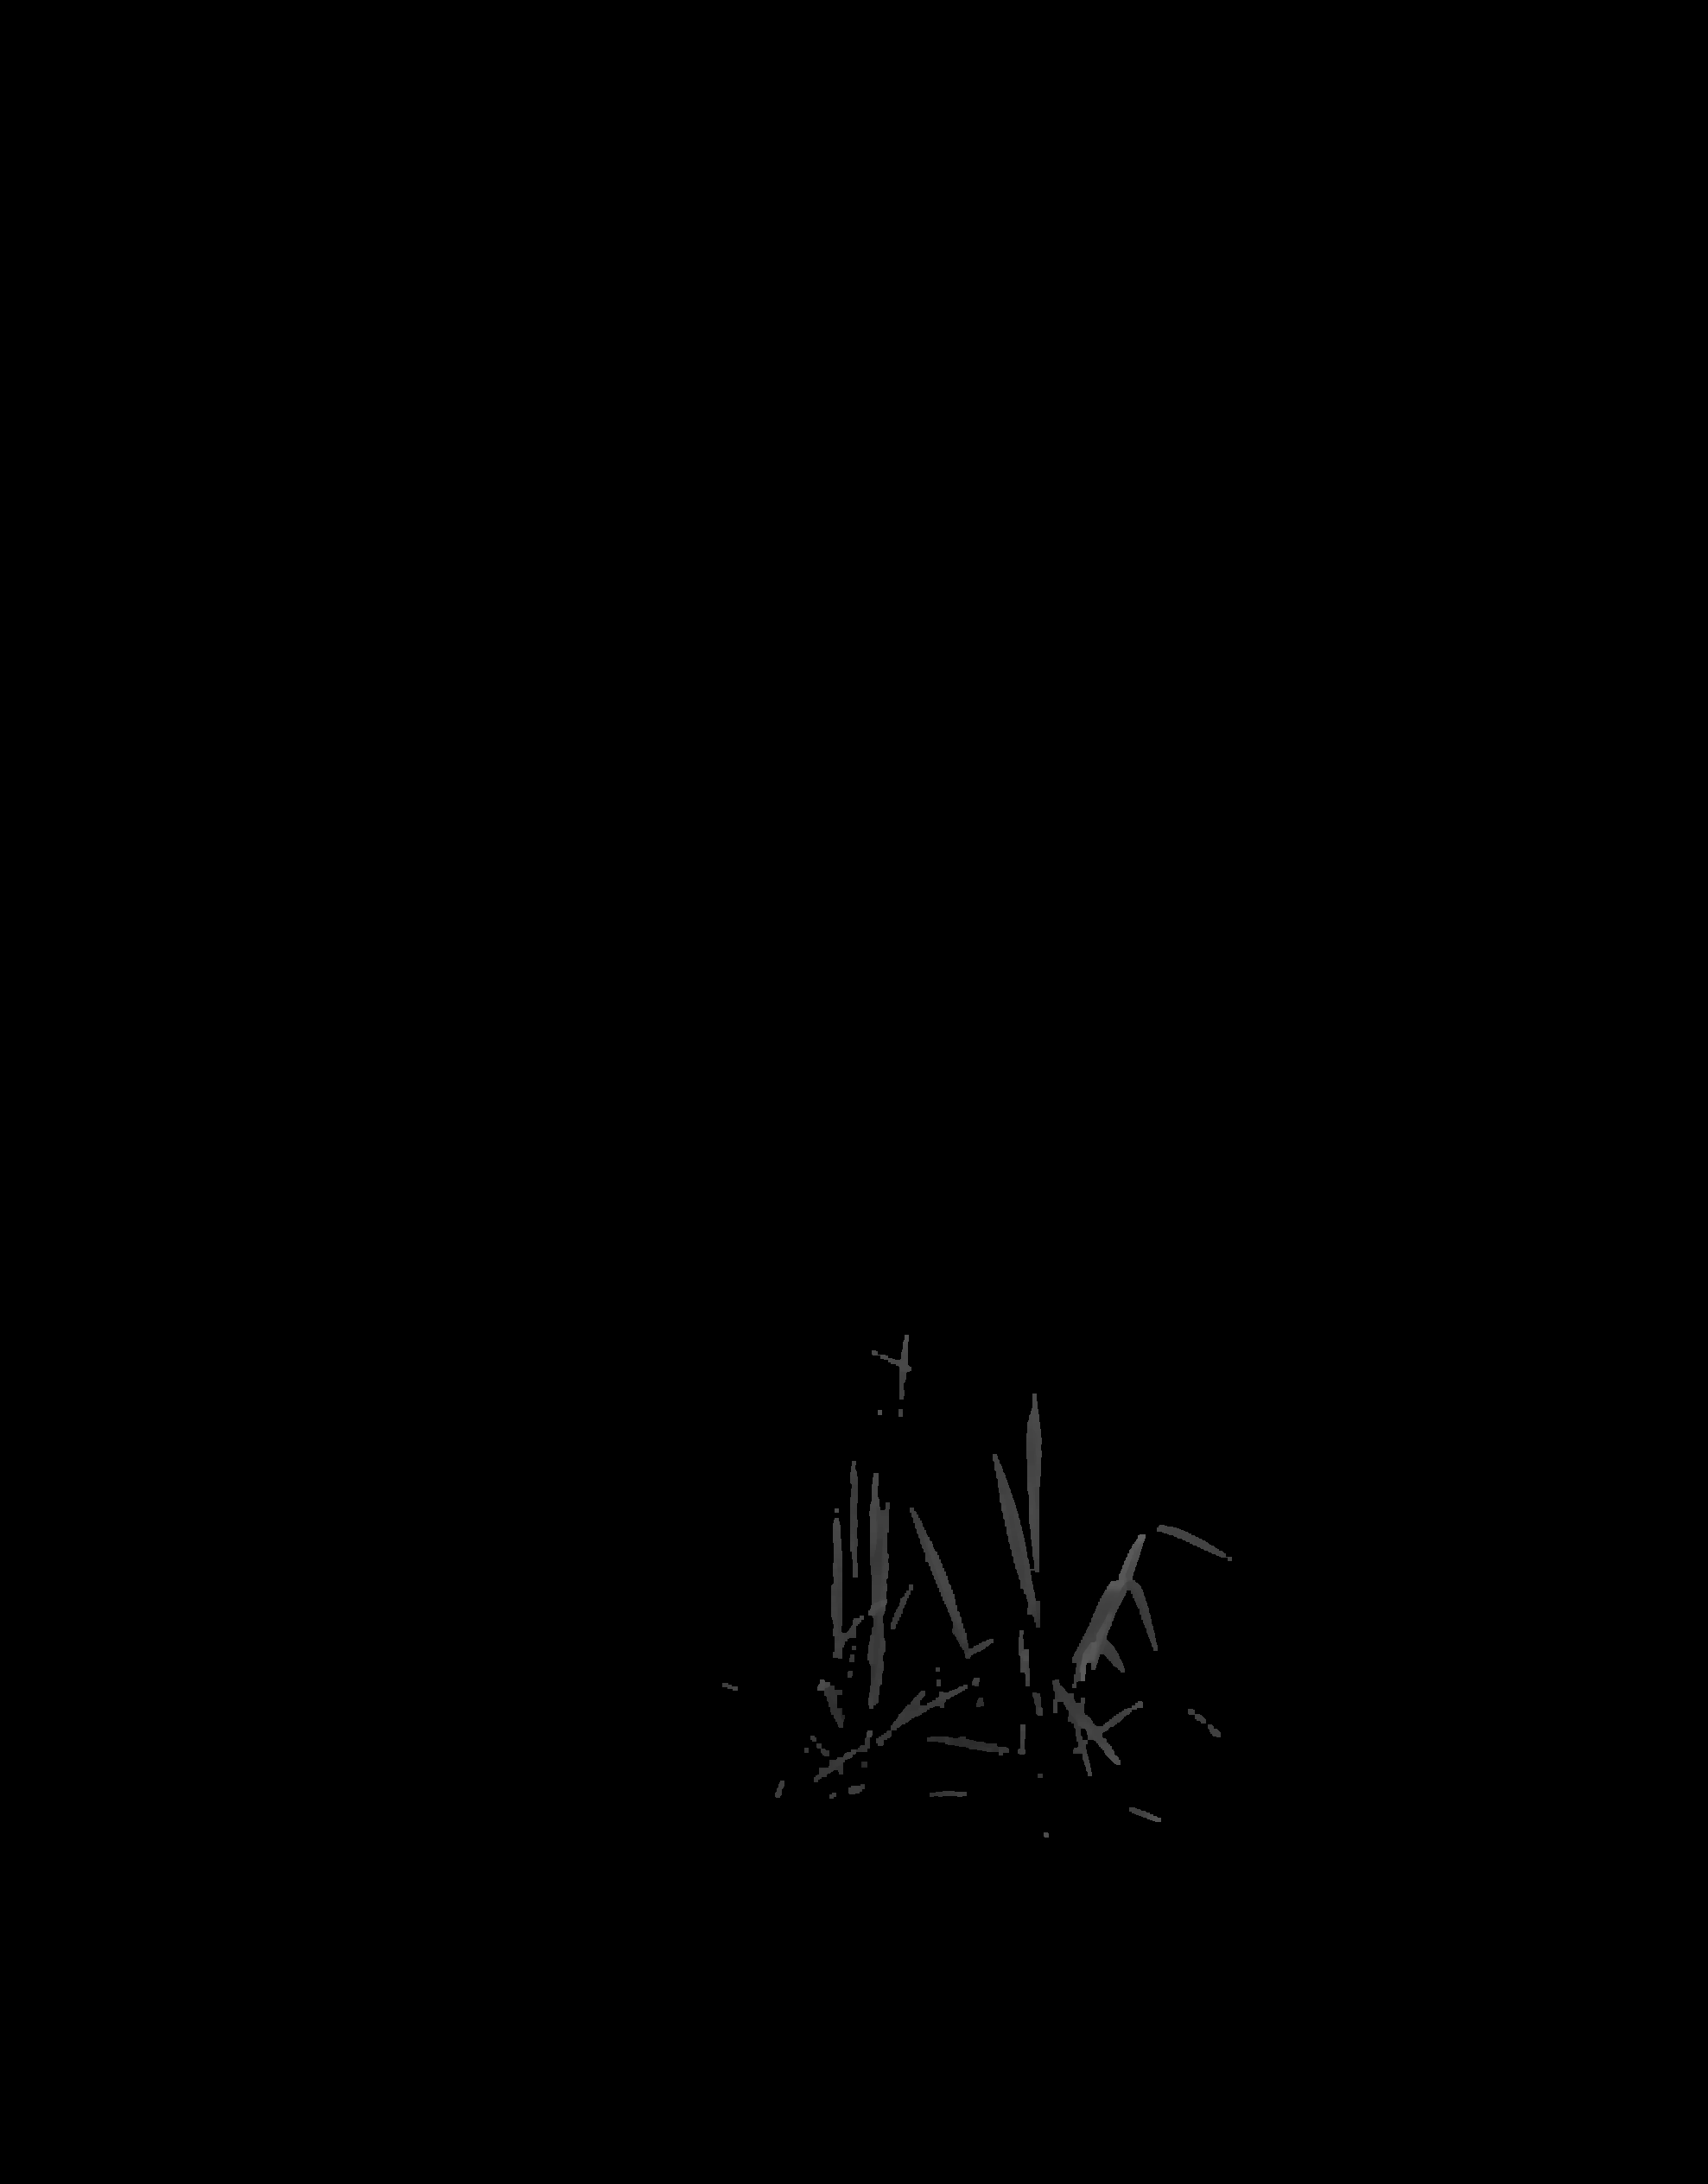

Neighborhood Analysis


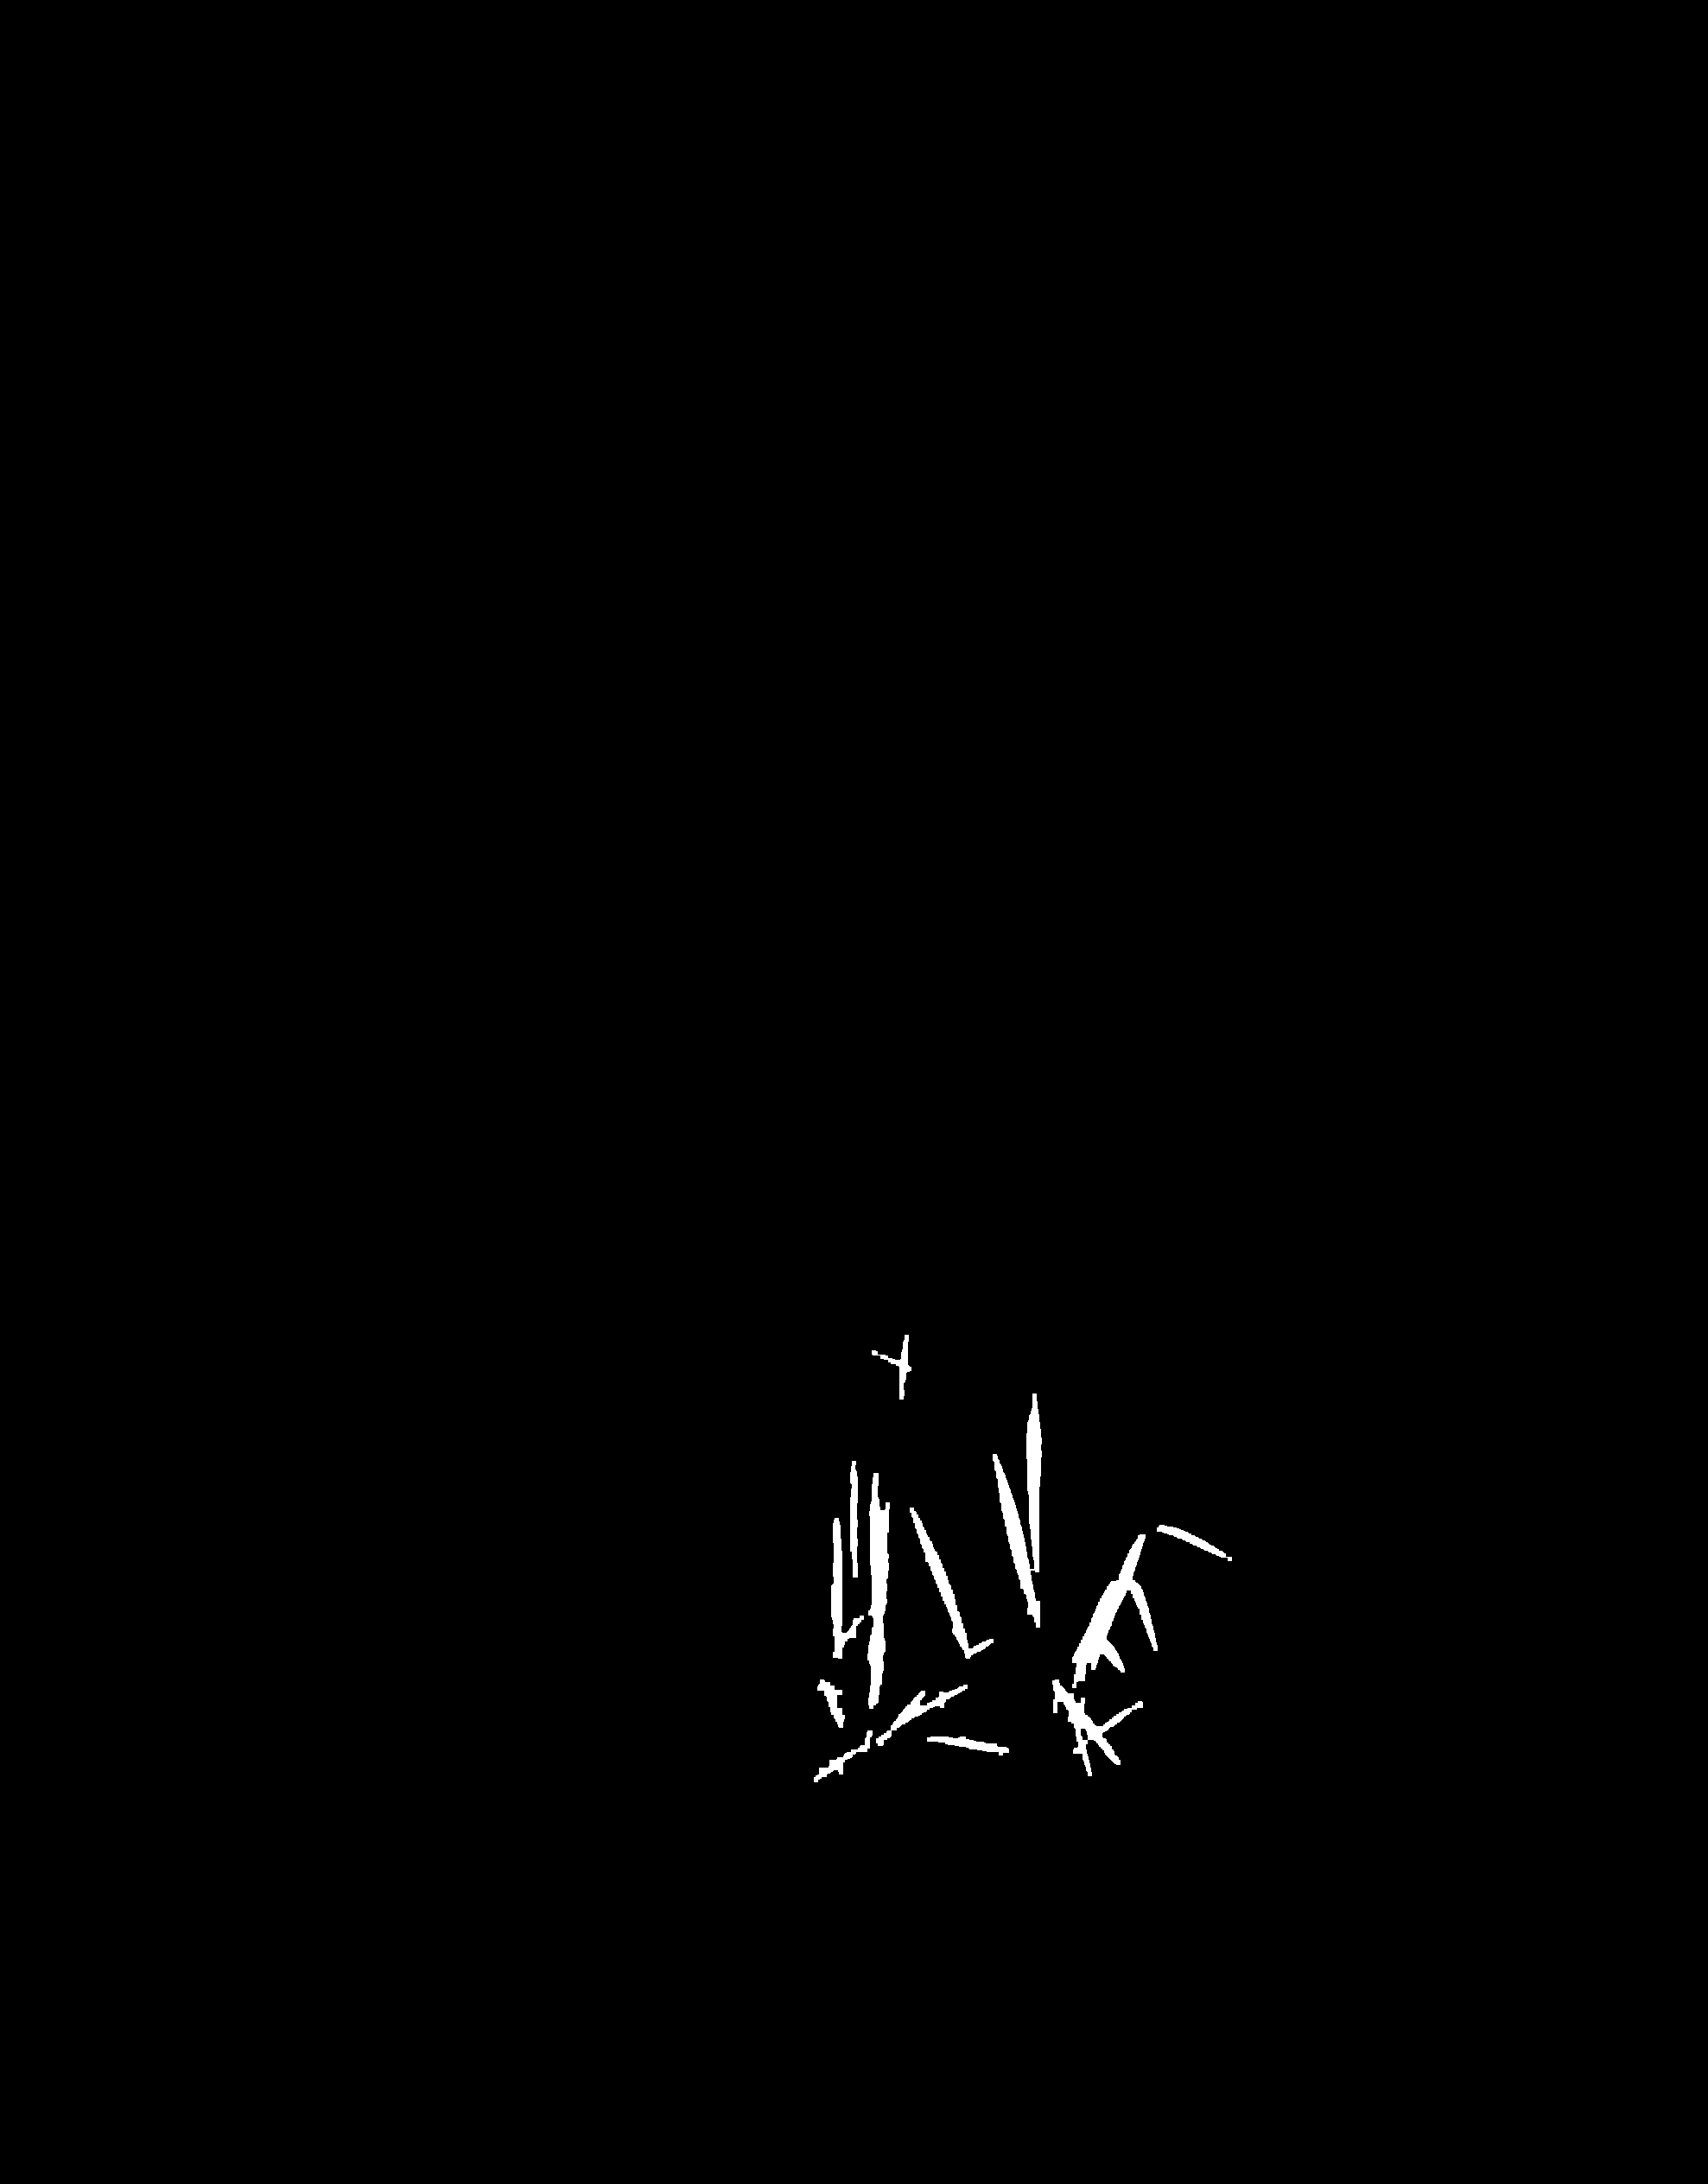

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Function to segment the green region in an RGB image
def segment_green(image, threshold=50):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define lower and upper bounds for green color in HSV
    lower_green = np.array([40, 40, 40])  # Adjust these values if needed
    upper_green = np.array([70, 255, 255])  # Adjust these values if needed
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    # Apply the mask to the original RGB image
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

# Function to apply morphological operations
def apply_morphological_operations(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply opening (erosion followed by dilation)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

    # Apply closing (dilation followed by erosion)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    return closing

# Function to perform neighborhood analysis with connected component labeling
def neighborhood_analysis(image):
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Create an output image to draw the results
    output_image = np.zeros(image.shape, dtype=np.uint8)

    # Process each component based on its size
    for i in range(1, num_labels):  # Skip the background
        if stats[i, cv2.CC_STAT_AREA] >= 500:  # Keep only large components (adjust the threshold as needed)
            output_image[labels == i] = 255

    return output_image

# Sample RGB image
image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print(f"Error: Unable to load the image at {image_path}. Please check the file path and format.")
else:
    # Segment the green region
    segmented_green = segment_green(image)

    # Apply morphological operations
    refined_image = apply_morphological_operations(segmented_green)

    # Perform neighborhood analysis with connected component labeling
    analyzed_image = neighborhood_analysis(refined_image)

    # Show the original and processed images
    print("Original Image")
    cv2_imshow(image)

    print("Segmented Green")
    cv2_imshow(segmented_green)

    print("Refined Image")
    cv2_imshow(refined_image)

    print("Neighborhood Analysis")
    cv2_imshow(analyzed_image)


In [ ]:
https://chatgpt.com/share/2146ab0d-128f-4a42-b5f4-5e69dcc3328b

SyntaxError: invalid decimal literal (<ipython-input-9-d2e4bfa69bda>, line 1)

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/IMAGEprossing/0_0_0.png")
b, g, r = cv2.split(img)
cv2_imshow(g)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the RGB image
image = cv2.imread("/content/drive/MyDrive/IMAGEprossing/0_0_0.png")

# Define the color range for the mask (green color)
lower_bound = np.array([0, 100, 0])  # Lower bound of green in BGR
upper_bound = np.array([100, 255, 100])  # Upper bound of green in BGR

# Convert the RGB image to a binary mask based on the color range
mask = cv2.inRange(image, lower_bound, upper_bound)

# Save the mask image
cv2.imwrite('mask_image.jpg', mask)

# Display the mask image
cv2_imshow(mask)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the RGB image
image = cv2.imread("/content/drive/MyDrive/IMAGEprossing/0_0_0.png")

# Define the color range for the mask (green color)
lower_bound = np.array([0, 100, 0])  # Lower bound of green in BGR
upper_bound = np.array([100, 255, 100])  # Upper bound of green in BGR

# Convert the RGB image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to binary mask based on the color range
mask = cv2.inRange(image, lower_bound, upper_bound)

# Save the mask image
cv2.imwrite('mask_image.jpg', mask)

# Display the mask image
cv2_imshow(mask)


In [ ]:
import cv2

def rgb_to_grayscale(image_path):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Convert RGB to Grayscale
    grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

    return grayscale_image

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = rgb_to_grayscale(input_image_path)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)


**bold text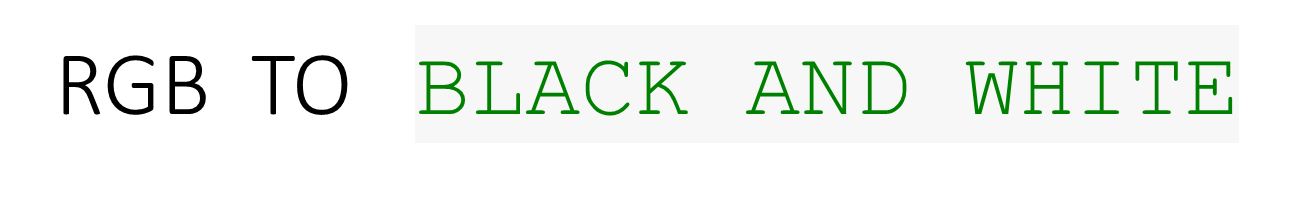**

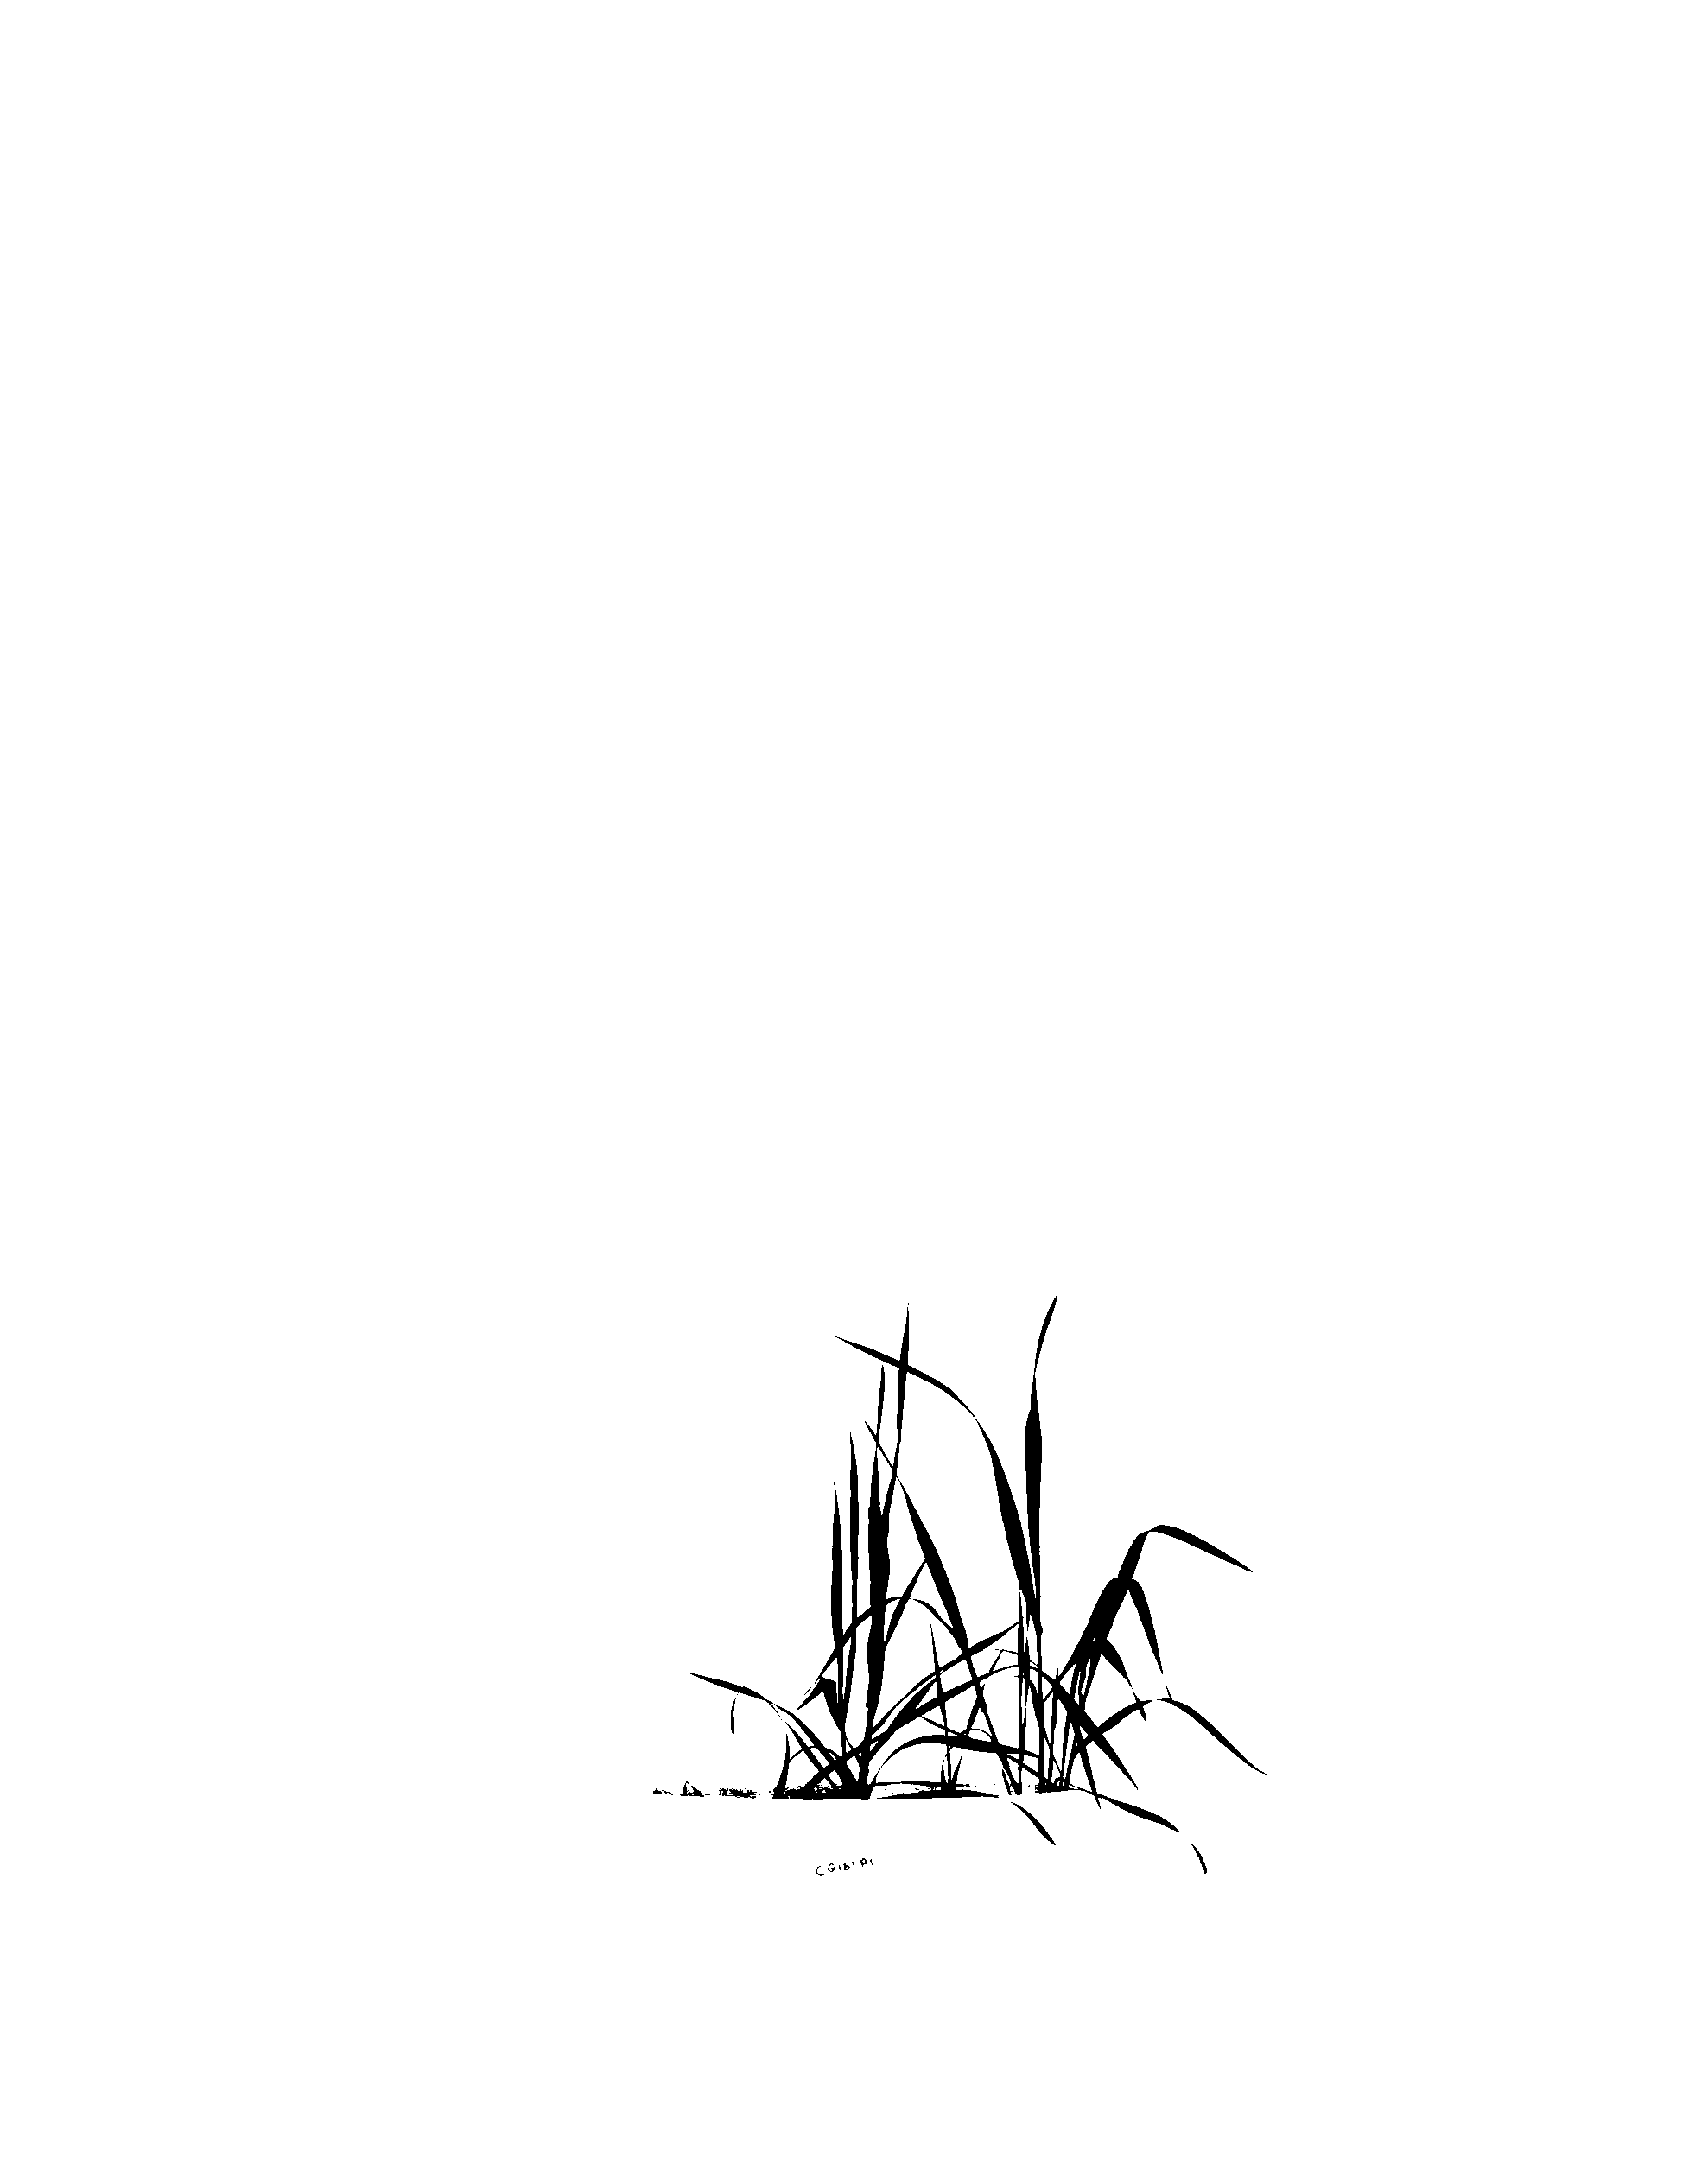

In [ ]:
import cv2

def rgb_to_blackwhite(image_path):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Convert RGB to Grayscale
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

    # Convert Grayscale to Black and White (Binary)
    _, blackwhite_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    return blackwhite_image

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = rgb_to_blackwhite(input_image_path)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)

In [ ]:
import cv2

def red_channel_image(image_path):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Extract the Red channel
    red_channel_image = rgb_image[:, :, 2]
     # Convert Grayscale to Black and White (Binary)
    _, blackwhite_image = cv2.threshold(red_channel_image, 127, 255, cv2.THRESH_BINARY)

    return blackwhite_image

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = red_channel_image(input_image_path)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)




In [ ]:
import cv2

def red_channel_image(image_path):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Extract the Red channel
    red_channel_image = rgb_image[:, :, 1]            #[:, :, 1] specifies the slicing operation:
                                                          #The first : means "select all rows" (no row selection).
                                                          #The second : means "select all columns" (no column selection).
                                                          #The 1 means "select the channel at index 1," which corresponds to the green channel in OpenCV's BGR color order (OpenCV uses BGR instead of RGB).

    return red_channel_image

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = red_channel_image(input_image_path)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)


In [ ]:
import cv2

def red_channel_image(image_path):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Extract the Red channel
    red_channel_image = rgb_image[:, :, 0]

    return red_channel_image

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = red_channel_image(input_image_path)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)



NameError: name 'cv2_imshow' is not defined

In [ ]:
#if i choose the particular portion of a chanel(red,green,blue)
import cv2

def green_channel_image_subset(image_path, start_row, end_row, start_col, end_col):
    # Read the RGB image
    rgb_image = cv2.imread(image_path)

    # Extract the Green channel
    green_channel_image_subset = rgb_image[start_row:end_row, start_col:end_col, 1]

    return green_channel_image_subset

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
# Define the subset region
start_row = 100
end_row = 200
start_col = 50
end_col = 150
output_image = green_channel_image_subset(input_image_path, start_row, end_row, start_col, end_col)
cv2.imwrite("output_image.jpg", output_image)
cv2_imshow(output_image)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(image_path, max_corners=100, quality_level=0.01, min_distance=10):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)
    corners = np.int0(corners)     #In the line corners = np.int0(corners), the np.int0() function converts the coordinates of the detected corners from floating-point numbers to integers.

    # Draw corners on the image
    for corner in corners:
        x, y = corner.ravel()     #In the line x, y = corner.ravel(), corner.ravel() is a NumPy function that flattens the array corner into a 1-dimensional array.
        cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

        #The line cv2.circle(img, (x, y), 3, (0, 255, 0), -1) is a function call to draw a filled circle on the image img.
        #Here's what each parameter means:
        #img: This is the image on which you want to draw the circle.
        #(x, y): These are the coordinates of the center of the circle. They were extracted from the corner array and represent the location of a detected corner.
        #3: This is the radius of the circle.
        #(0, 255, 0): This is the color of the circle in BGR format. Here, it's (0, 255, 0), which corresponds to green.
        #-1: This is the thickness of the circle's outline. A value of -1 indicates that the circle should be filled, meaning its interior will be colored with the specified color.

    return img

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = detect_corners(input_image_path)

# Display the result in Jupyter Notebook
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt

def detect_features(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    keypoints, descriptors = orb.detectAndCompute(img, None)

    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return img_with_keypoints

# Example usage
input_image_path = "/content/drive/MyDrive/IMAGEprossing/0_0_0.png"
output_image = detect_features(input_image_path)

# Display the result
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()
